# **New York City Yellow Taxi Data**

## Objective
In this case study you will be learning exploratory data analysis (EDA) with the help of a dataset on yellow taxi rides in New York City. This will enable you to understand why EDA is an important step in the process of data science and machine learning.

## **Problem Statement**
As an analyst at an upcoming taxi operation in NYC, you are tasked to use the 2023 taxi trip data to uncover insights that could help optimise taxi operations. The goal is to analyse patterns in the data that can inform strategic decisions to improve service efficiency, maximise revenue, and enhance passenger experience.

## Tasks
You need to perform the following steps for successfully completing this assignment:
1. Data Loading
2. Data Cleaning
3. Exploratory Analysis: Bivariate and Multivariate
4. Creating Visualisations to Support the Analysis
5. Deriving Insights and Stating Conclusions

---

**NOTE:** The marks given along with headings and sub-headings are cumulative marks for those particular headings/sub-headings.<br>

The actual marks for each task are specified within the tasks themselves.

For example, marks given with heading *2* or sub-heading *2.1* are the cumulative marks, for your reference only. <br>

The marks you will receive for completing tasks are given with the tasks.

Suppose the marks for two tasks are: 3 marks for 2.1.1 and 2 marks for 3.2.2, or
* 2.1.1 [3 marks]
* 3.2.2 [2 marks]

then, you will earn 3 marks for completing task 2.1.1 and 2 marks for completing task 3.2.2.


---

## Data Understanding
The yellow taxi trip records include fields capturing pick-up and drop-off dates/times, pick-up and drop-off locations, trip distances, itemized fares, rate types, payment types, and driver-reported passenger counts.

The data is stored in Parquet format (*.parquet*). The dataset is from 2009 to 2024. However, for this assignment, we will only be using the data from 2023.

The data for each month is present in a different parquet file. You will get twelve files for each of the months in 2023.

The data was collected and provided to the NYC Taxi and Limousine Commission (TLC) by technology providers like vendors and taxi hailing apps. <br>

You can find the link to the TLC trip records page here: https://www.nyc.gov/site/tlc/about/tlc-trip-record-data.page

###  Data Description
You can find the data description here: [Data Dictionary](https://www.nyc.gov/assets/tlc/downloads/pdf/data_dictionary_trip_records_yellow.pdf)

**Trip Records**



|Field Name       |description |
|:----------------|:-----------|
| VendorID | A code indicating the TPEP provider that provided the record. <br> 1= Creative Mobile Technologies, LLC; <br> 2= VeriFone Inc. |
| tpep_pickup_datetime | The date and time when the meter was engaged.  |
| tpep_dropoff_datetime | The date and time when the meter was disengaged.   |
| Passenger_count | The number of passengers in the vehicle. <br> This is a driver-entered value. |
| Trip_distance | The elapsed trip distance in miles reported by the taximeter. |
| PULocationID | TLC Taxi Zone in which the taximeter was engaged |
| DOLocationID | TLC Taxi Zone in which the taximeter was disengaged |
|RateCodeID |The final rate code in effect at the end of the trip.<br> 1 = Standard rate <br> 2 = JFK <br> 3 = Newark <br>4 = Nassau or Westchester <br>5 = Negotiated fare <br>6 = Group ride |
|Store_and_fwd_flag |This flag indicates whether the trip record was held in vehicle memory before sending to the vendor, aka “store and forward,” because the vehicle did not have a connection to the server.  <br>Y= store and forward trip <br>N= not a store and forward trip |
|Payment_type| A numeric code signifying how the passenger paid for the trip. <br> 1 = Credit card <br>2 = Cash <br>3 = No charge <br>4 = Dispute <br>5 = Unknown <br>6 = Voided trip |
|Fare_amount| The time-and-distance fare calculated by the meter. <br>Extra Miscellaneous extras and surcharges.  Currently, this only includes the 0.50 and 1 USD rush hour and overnight charges. |
|MTA_tax |0.50 USD MTA tax that is automatically triggered based on the metered rate in use. |
|Improvement_surcharge | 0.30 USD improvement surcharge assessed trips at the flag drop. The improvement surcharge began being levied in 2015. |
|Tip_amount |Tip amount – This field is automatically populated for credit card tips. Cash tips are not included. |
| Tolls_amount | Total amount of all tolls paid in trip.  |
| total_amount | The total amount charged to passengers. Does not include cash tips. |
|Congestion_Surcharge |Total amount collected in trip for NYS congestion surcharge. |
| Airport_fee | 1.25 USD for pick up only at LaGuardia and John F. Kennedy Airports|

Although the amounts of extra charges and taxes applied are specified in the data dictionary, you will see that some cases have different values of these charges in the actual data.

**Taxi Zones**

Each of the trip records contains a field corresponding to the location of the pickup or drop-off of the trip, populated by numbers ranging from 1-263.

These numbers correspond to taxi zones, which may be downloaded as a table or map/shapefile and matched to the trip records using a join.

This is covered in more detail in later sections.

---

## **1** Data Preparation

<font color = red>[5 marks]</font> <br>

### Import Libraries

In [1]:
# Import warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import the libraries you will be using for analysis
import numpy as np      
import pandas as pd   
import matplotlib.pyplot as plt
import seaborn as sns    

In [3]:
# Recommended versions
# numpy version: 1.26.4
# pandas version: 2.2.2
# matplotlib version: 3.10.0
# seaborn version: 0.13.2

# Check versions
print("numpy version:", np.__version__)
print("pandas version:", pd.__version__)
print("matplotlib version:", plt.matplotlib.__version__)
print("seaborn version:", sns.__version__)

numpy version: 1.26.4
pandas version: 2.2.2
matplotlib version: 3.10.0
seaborn version: 0.13.2


### **1.1** Load the dataset
<font color = red>[5 marks]</font> <br>

You will see twelve files, one for each month.

To read parquet files with Pandas, you have to follow a similar syntax as that for CSV files.

`df = pd.read_parquet('file.parquet')`

In [4]:
# Try loading one file
df = pd.read_parquet('Datasets and Dictionary/trip_records/2023-1.parquet')
df.info()
# df = pd.read_parquet('2023-1.parquet')
# df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 3041714 entries, 0 to 3066765
Data columns (total 19 columns):
 #   Column                 Dtype         
---  ------                 -----         
 0   VendorID               int64         
 1   tpep_pickup_datetime   datetime64[us]
 2   tpep_dropoff_datetime  datetime64[us]
 3   passenger_count        float64       
 4   trip_distance          float64       
 5   RatecodeID             float64       
 6   store_and_fwd_flag     object        
 7   PULocationID           int64         
 8   DOLocationID           int64         
 9   payment_type           int64         
 10  fare_amount            float64       
 11  extra                  float64       
 12  mta_tax                float64       
 13  tip_amount             float64       
 14  tolls_amount           float64       
 15  improvement_surcharge  float64       
 16  total_amount           float64       
 17  congestion_surcharge   float64       
 18  airport_fee            floa

How many rows are there? Do you think handling such a large number of rows is computationally feasible when we have to combine the data for all twelve months into one?

To handle this, we need to sample a fraction of data from each of the files. How to go about that? Think of a way to select only some portion of the data from each month's file that accurately represents the trends.

#### Sampling the Data
> One way is to take a small percentage of entries for pickup in every hour of a date. So, for all the days in a month, we can iterate through the hours and select 5% values randomly from those. Use `tpep_pickup_datetime` for this. Separate date and hour from the datetime values and then for each date, select some fraction of trips for each of the 24 hours.

To sample data, you can use the `sample()` method. Follow this syntax:

```Python
# sampled_data is an empty DF to keep appending sampled data of each hour
# hour_data is the DF of entries for an hour 'X' on a date 'Y'

sample = hour_data.sample(frac = 0.05, random_state = 42)
# sample 0.05 of the hour_data
# random_state is just a seed for sampling, you can define it yourself

sampled_data = pd.concat([sampled_data, sample]) # adding data for this hour to the DF
```

This *sampled_data* will contain 5% values selected at random from each hour.

Note that the code given above is only the part that will be used for sampling and not the complete code required for sampling and combining the data files.

Keep in mind that you sample by date AND hour, not just hour. (Why?)

---

**1.1.1** <font color = red>[5 marks]</font> <br>
Figure out how to sample and combine the files.

**Note:** It is not mandatory to use the method specified above. While sampling, you only need to make sure that your sampled data represents the overall data of all the months accurately.

In [5]:
# Sample the data
# It is recommmended to not load all the files at once to avoid memory overload

In [6]:
# from google.colab import drive
# drive.mount('/content/drive')

In [7]:
# Take a small percentage of entries from each hour of every date.
# Iterating through the monthly data:
#   read a month file -> day -> hour: append sampled data -> move to next hour -> move to next day after 24 hours -> move to next month file
# Create a single dataframe for the year combining all the monthly data

# Select the folder having data files
import os

# Select the folder having data files
os.chdir('/Users/professorx/Documents/PythonUpgrad/EDA Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records')

# Create a list of all the twelve files to read
file_list = os.listdir()

# initialise an empty dataframe
df = pd.DataFrame()


# iterate through the list of files and sample one by one:
for file_name in file_list:
    try:
        # file path for the current file
        file_path = os.path.join(os.getcwd(), file_name)

        # Reading the current file
        monthly_data = pd.read_parquet(file_path)
        monthly_data['tpep_pickup_datetime'] = pd.to_datetime(monthly_data['tpep_pickup_datetime'])


        # We will store the sampled data for the current date in this df by appending the sampled data from each hour to this
        # After completing iteration through each date, we will append this data to the final dataframe.
        sampled_data = pd.DataFrame()

        # Loop through dates and then loop through every hour of each date
        for date in monthly_data['tpep_pickup_datetime'].dt.date.unique():
            daily_data = monthly_data[monthly_data['tpep_pickup_datetime'].dt.date == date]

            # Iterate through each hour of the selected date
            for hour in range(24):
                hourly_data = daily_data[daily_data['tpep_pickup_datetime'].dt.hour == hour]

                # Sample 5% of the hourly data randomly
                if not hourly_data.empty:
                    hourly_sample = hourly_data.sample(frac= 0.05 , random_state = 42)

                # add data of this hour to the dataframe
                    sampled_data = pd.concat([sampled_data,hourly_sample],ignore_index=True)

        # Concatenate the sampled data of all the dates to a single dataframe
        df = pd.concat([df,sampled_data],ignore_index = True)# we initialised this empty DF earlier
        print('Merged successfully ..')
    except Exception as e:
        print(f"Error reading file {file_name}: {e}")

Merged successfully ..
Merged successfully ..
Merged successfully ..
Error reading file .DS_Store: Could not open Parquet input source '<Buffer>': Parquet magic bytes not found in footer. Either the file is corrupted or this is not a parquet file.
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Merged successfully ..
Error reading file .ipynb_checkpoints: 'tpep_pickup_datetime'
Merged successfully ..
Merged successfully ..


After combining the data files into one DataFrame, convert the new DataFrame to a CSV or parquet file and store it to use directly.

Ideally, you can try keeping the total entries to around 250,000 to 300,000.

In [8]:
# Store the df in csv/parquet
# df.to_parquet('')
target_rows = 300_000
if len(df) > target_rows:
    df = df.sample(n=target_rows, random_state=42)

df.to_parquet('nyc_taxi_final.parquet', index=False)
print("Final dataset saved as 'nyc_taxi_final.parquet'")

Final dataset saved as 'nyc_taxi_final.parquet'


## **2** Data Cleaning
<font color = red>[30 marks]</font> <br>

Now we can load the new data directly.

In [9]:
# Load the new data file
df = pd.read_parquet('/Users/professorx/Documents/PythonUpgrad/EDA Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/trip_records/nyc_taxi_final.parquet')
print("Data loaded successfully. Shape:", df.shape)

Data loaded successfully. Shape: (300000, 20)


In [10]:
# df.head()
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,store_and_fwd_flag,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,Airport_fee,airport_fee
0,2,2023-02-14 19:15:19,2023-02-14 19:43:42,1.0,4.09,1.0,N,229,231,1,25.4,2.5,0.5,6.38,0.0,1.0,38.28,2.5,0.0,NaN
1,2,2023-02-17 20:04:50,2023-02-17 20:15:17,1.0,2.62,1.0,N,142,262,1,13.5,2.5,0.5,5.00,0.0,1.0,25.00,2.5,0.0,NaN
2,2,2023-05-12 02:57:41,2023-05-12 03:02:01,1.0,1.00,1.0,N,186,230,1,7.2,1.0,0.5,2.44,0.0,1.0,14.64,2.5,0.0,NaN
3,2,2023-06-28 18:07:39,2023-06-28 18:10:43,1.0,0.54,1.0,N,249,249,1,5.1,2.5,0.5,2.32,0.0,1.0,13.92,2.5,0.0,NaN
4,2,2023-10-21 22:38:34,2023-10-21 22:58:15,1.0,1.28,1.0,N,249,79,1,12.8,1.0,0.5,3.56,0.0,1.0,21.36,2.5,0.0,NaN


In [11]:
# df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300000 entries, 0 to 299999
Data columns (total 20 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   VendorID               300000 non-null  int64         
 1   tpep_pickup_datetime   300000 non-null  datetime64[us]
 2   tpep_dropoff_datetime  300000 non-null  datetime64[us]
 3   passenger_count        289784 non-null  float64       
 4   trip_distance          300000 non-null  float64       
 5   RatecodeID             289784 non-null  float64       
 6   store_and_fwd_flag     289784 non-null  object        
 7   PULocationID           300000 non-null  int64         
 8   DOLocationID           300000 non-null  int64         
 9   payment_type           300000 non-null  int64         
 10  fare_amount            300000 non-null  float64       
 11  extra                  300000 non-null  float64       
 12  mta_tax                300000 non-null  floa

#### **2.1** Fixing Columns
<font color = red>[10 marks]</font> <br>

Fix/drop any columns as you seem necessary in the below sections

**2.1.1** <font color = red>[2 marks]</font> <br>

Fix the index and drop unnecessary columns

In [12]:
# Fix the index and drop any columns that are not needed
df.reset_index(drop=True, inplace=True)
df.drop(columns= 'store_and_fwd_flag',inplace=True)

**2.1.2** <font color = red>[3 marks]</font> <br>
There are two airport fee columns. This is possibly an error in naming columns. Let's see whether these can be combined into a single column.

In [13]:
# Combine the two airport fee columns
if 'Airport_fee' in df.columns and 'airport_fee' in df.columns:
    df['airport_fee'] = df['Airport_fee'].fillna(df['airport_fee'])
    df.drop(columns='Airport_fee',inplace=True)

In [14]:
df.isnull().sum()

VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count          10216
trip_distance                0
RatecodeID               10216
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge     10216
airport_fee              10216
dtype: int64

**2.1.3** <font color = red>[5 marks]</font> <br>
Fix columns with negative (monetary) values

In [15]:
# check where values of fare amount are negative
negative_fares=df[df['fare_amount'] < 0]
negative_fares.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee


Did you notice something different in the `RatecodeID` column for above records?

In [16]:
# Analyse RatecodeID for the negative fare amounts
ratecode_negative_fares = negative_fares.groupby('RatecodeID')['fare_amount'].count()
ratecode_negative_fares.head()

Series([], Name: fare_amount, dtype: int64)

In [17]:
# Find which columns have negative values
negative_cols = {}
for col in df.select_dtypes(include=['int64','float64']).columns:
    if (df[col] < 0).any():
        negative_cols[col] = df[df[col] < 0]
for col, data in negative_cols.items():
    print(f"Column '{col}' has {data.shape[0]} negative values.")

Column 'mta_tax' has 15 negative values.
Column 'improvement_surcharge' has 16 negative values.
Column 'total_amount' has 16 negative values.
Column 'congestion_surcharge' has 10 negative values.
Column 'airport_fee' has 4 negative values.


In [18]:
# fix these negative values
neg_cols = ['mta_tax', 'improvement_surcharge', 'total_amount', 
            'congestion_surcharge', 'airport_fee']
for col in neg_cols:
    negative_count = (df[col] < 0).sum()
    if negative_count > 0:
        df = df[df[col] >= 0]
        print(f"Removed {negative_count} rows with negative values in '{col}'.")
print("Shape after removing negatives:", df.shape)

# doing above code like to multiple run code won't fail
# single run we can write directly df = df[df[col] >= 0]

Removed 15 rows with negative values in 'mta_tax'.
Removed 1 rows with negative values in 'improvement_surcharge'.
Shape after removing negatives: (299984, 18)


### **2.2** Handling Missing Values
<font color = red>[10 marks]</font> <br>

**2.2.1**  <font color = red>[2 marks]</font> <br>
Find the proportion of missing values in each column




In [19]:
# Find the proportion of missing values in each column
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'missing_count': missing_values,
    'missing_percentage': missing_percentage
}).sort_values(by='missing_percentage', ascending=False)
missing_summary

,missing_count,missing_percentage
airport_fee,10216,3.405515
congestion_surcharge,10216,3.405515
passenger_count,10216,3.405515
RatecodeID,10216,3.405515
extra,0,0.000000
total_amount,0,0.000000
improvement_surcharge,0,0.000000
tolls_amount,0,0.000000
tip_amount,0,0.000000
mta_tax,0,0.000000


**2.2.2**  <font color = red>[3 marks]</font> <br>
Handling missing values in `passenger_count`

In [20]:
# Display the rows with null values
# Impute NaN values in 'passenger_count'
null_passenger = df[df['passenger_count'].isnull()]
# Fill NaN values in passenger_count with 1 we can do it by median
df['passenger_count'].fillna(1, inplace=True)
print("Remaining NaN values in passenger_count:", df['passenger_count'].isnull().sum())

Remaining NaN values in passenger_count: 0


Did you find zeroes in passenger_count? Handle these.

In [21]:
zero_passenger = df[df['passenger_count']==0]
zero_passenger

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
99,1,2023-11-27 18:34:34,2023-11-27 18:54:59,0.0,2.9,1.0,161,249,1,19.1,5.00,0.5,5.1,0.00,1.0,30.7,2.5,0.00
184,1,2023-06-01 10:27:21,2023-06-01 11:12:04,0.0,8.2,1.0,138,170,2,45.0,9.25,0.5,0.0,6.55,1.0,62.3,2.5,1.75
453,1,2023-02-09 20:33:25,2023-02-09 20:48:24,0.0,3.5,1.0,164,262,1,17.0,3.50,0.5,4.4,0.00,1.0,26.4,2.5,0.00
544,1,2023-06-21 15:24:56,2023-06-21 15:42:17,0.0,1.4,1.0,162,100,1,14.9,2.50,0.5,0.0,0.00,1.0,18.9,2.5,0.00
641,1,2023-10-31 08:21:06,2023-10-31 08:35:34,0.0,1.7,1.0,236,239,2,14.9,2.50,0.5,0.0,0.00,1.0,18.9,2.5,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
299602,1,2023-05-14 07:06:16,2023-05-14 07:10:33,0.0,1.0,1.0,249,68,1,7.2,2.50,0.5,2.2,0.00,1.0,13.4,2.5,0.00
299636,1,2023-06-22 21:20:20,2023-06-22 21:39:48,0.0,3.1,1.0,114,48,1,17.7,3.50,0.5,6.8,0.00,1.0,29.5,2.5,0.00
299638,1,2023-08-08 18:58:53,2023-08-08 18:58:59,0.0,0.0,1.0,145,145,2,3.0,2.50,0.5,0.0,0.00,1.0,7.0,0.0,0.00
299678,1,2023-01-11 14:08:36,2023-01-11 14:11:29,0.0,0.6,1.0,68,68,1,5.1,2.50,0.5,0.0,0.00,1.0,9.1,2.5,0.00


In [22]:
df.loc[df['passenger_count'] == 0,'passenger_count'] = 1
print("Zeros in passenger_count handled.")
print("Zero count after fix:", (df['passenger_count'] == 0).sum())

Zeros in passenger_count handled.
Zero count after fix: 0


**2.2.3**  <font color = red>[2 marks]</font> <br>
Handle missing values in `RatecodeID`

In [23]:
# Fix missing values in 'RatecodeID'
print("Missing RatecodeID count:", df['RatecodeID'].isna().sum())
print("Value counts:\n", df['RatecodeID'].value_counts())
mode_ratecode = df['RatecodeID'].mode()[0]
df['RatecodeID'].fillna(mode_ratecode, inplace=True)
print("RatecodeID missing values are filled with value :",mode_ratecode)

Missing RatecodeID count: 10216
Value counts:
 RatecodeID
1.0     273418
2.0      11496
99.0      1702
5.0       1634
3.0        949
4.0        569
Name: count, dtype: int64
RatecodeID missing values are filled with value : 1.0


**2.2.4**  <font color = red>[3 marks]</font> <br>
Impute NaN in `congestion_surcharge`

In [24]:
# handle null values in congestion_surcharge
print("Value counts:\n", df['congestion_surcharge'].value_counts())
mode_surcharge = df['congestion_surcharge'].mode()[0]
df['congestion_surcharge'].fillna(mode_surcharge, inplace=True)
print("Remaining nulls in congestion_surcharge:", df['congestion_surcharge'].isna().sum())

Value counts:
 congestion_surcharge
2.5    267265
0.0     22503
Name: count, dtype: int64
Remaining nulls in congestion_surcharge: 0


Are there missing values in other columns? Did you find NaN values in some other set of columns? Handle those missing values below.

In [25]:
# checking the remaining NaN values in any other columns
print("Columns with NaN values count:\n",df.isna().sum())

Columns with NaN values count:
 VendorID                     0
tpep_pickup_datetime         0
tpep_dropoff_datetime        0
passenger_count              0
trip_distance                0
RatecodeID                   0
PULocationID                 0
DOLocationID                 0
payment_type                 0
fare_amount                  0
extra                        0
mta_tax                      0
tip_amount                   0
tolls_amount                 0
improvement_surcharge        0
total_amount                 0
congestion_surcharge         0
airport_fee              10216
dtype: int64


In [26]:
# Handle any remaining missing values
# checking with airport_fee NaN values
print(df['airport_fee'].value_counts())
# Most trips don’t incur airport fees, so it’s safe to fill missing values with 0.0
df['airport_fee'].fillna(0.0, inplace=True)
print(df.isna().sum())

airport_fee
0.00    264135
1.75     19258
1.25      6375
Name: count, dtype: int64
VendorID                 0
tpep_pickup_datetime     0
tpep_dropoff_datetime    0
passenger_count          0
trip_distance            0
RatecodeID               0
PULocationID             0
DOLocationID             0
payment_type             0
fare_amount              0
extra                    0
mta_tax                  0
tip_amount               0
tolls_amount             0
improvement_surcharge    0
total_amount             0
congestion_surcharge     0
airport_fee              0
dtype: int64


- No NaN values currently present in dataset

### **2.3** Handling Outliers
<font color = red>[10 marks]</font> <br>

Before we start fixing outliers, let's perform outlier analysis.

In [27]:
# Describe the data and check if there are any potential outliers present
# Check for potential out of place values in various columns
df.describe(percentiles=[0.01, 0.25, 0.5, 0.75, 0.99])


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
count,299984.000000,299984,299984,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000,299984.000000
mean,1.733032,2023-07-02 22:27:12.430369,2023-07-02 22:44:38.471989,1.370230,4.162454,1.628144,165.172983,164.140944,1.163592,20.357611,1.588438,0.495335,3.550581,0.593522,0.999075,29.421419,2.312465,0.138908
min,1.000000,2023-01-01 00:08:28,2023-01-01 00:14:41,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1%,1.000000,2023-01-05 16:14:49.160000,2023-01-05 16:31:21.960000,1.000000,0.000000,1.000000,24.000000,10.000000,0.000000,4.400000,0.000000,0.500000,0.000000,0.000000,1.000000,8.700000,0.000000,0.000000
25%,1.000000,2023-04-02 15:40:16.250000,2023-04-02 15:59:27.250000,1.000000,1.050000,1.000000,132.000000,114.000000,1.000000,9.300000,0.000000,0.500000,1.000000,0.000000,1.000000,15.960000,2.500000,0.000000
50%,2.000000,2023-06-27 20:20:16,2023-06-27 20:31:27.500000,1.000000,1.800000,1.000000,162.000000,162.000000,1.000000,13.500000,1.000000,0.500000,2.850000,0.000000,1.000000,21.100000,2.500000,0.000000
75%,2.000000,2023-10-07 00:54:49.750000,2023-10-07 01:09:41.500000,1.000000,3.400000,1.000000,234.000000,234.000000,1.000000,21.900000,2.500000,0.500000,4.450000,0.000000,1.000000,30.900000,2.500000,0.000000
99%,2.000000,2023-12-27 12:59:18.470000,2023-12-27 13:17:32.480000,5.000000,20.270000,5.000000,264.000000,264.000000,3.000000,77.900000,7.500000,0.500000,17.650000,6.940000,1.000000,104.150000,2.500000,1.750000
max,6.000000,2023-12-31 23:57:12,2024-01-01 12:29:40,9.000000,56823.800000,99.000000,265.000000,265.000000,4.000000,143163.450000,14.250000,0.800000,150.000000,77.750000,1.000000,143167.450000,2.500000,1.750000
std,0.447471,NaN,NaN,0.860486,152.376772,7.365488,64.019903,69.788722,0.507678,261.984652,1.831353,0.048143,4.033725,2.163828,0.027972,262.330217,0.658536,0.458817


**2.3.1**  <font color = red>[10 marks]</font> <br>
Based on the above analysis, it seems that some of the outliers are present due to errors in registering the trips. Fix the outliers.

Some points you can look for:
- Entries where `trip_distance` is nearly 0 and `fare_amount` is more than 300
- Entries where `trip_distance` and `fare_amount` are 0 but the pickup and dropoff zones are different (both distance and fare should not be zero for different zones)
- Entries where `trip_distance` is more than 250  miles.
- Entries where `payment_type` is 0 (there is no payment_type 0 defined in the data dictionary)

These are just some suggestions. You can handle outliers in any way you wish, using the insights from above outlier analysis.

How will you fix each of these values? Which ones will you drop and which ones will you replace?

First, let us remove 7+ passenger counts as there are very less instances.

In [28]:
# remove passenger_count > 6
df = df[df['passenger_count'] <= 6]
print(f'current rows count : {df.shape[0]}')
df['passenger_count'].value_counts()

current rows count : 299979


passenger_count
1.0    232972
2.0     43862
3.0     10894
4.0      6085
5.0      3707
6.0      2459
Name: count, dtype: int64

In [29]:
# Continue with outlier handling
# Entries where trip_distance is nearly 0 and fare_amount is more than 300
suspicious_fare_trips = df[(df['trip_distance'] < 0.1) & (df['fare_amount'] >= 300)]
print("Number of trips with trip_distance < 0.1 and fare > 300:", suspicious_fare_trips.shape[0])

suspicious_fare_trips[['trip_distance', 'fare_amount']].head()


Number of trips with trip_distance < 0.1 and fare > 300: 8


,trip_distance,fare_amount
23493,0.0,999.0
106426,0.0,399.0
116071,0.0,340.0
124391,0.0,300.0
141250,0.0,300.0


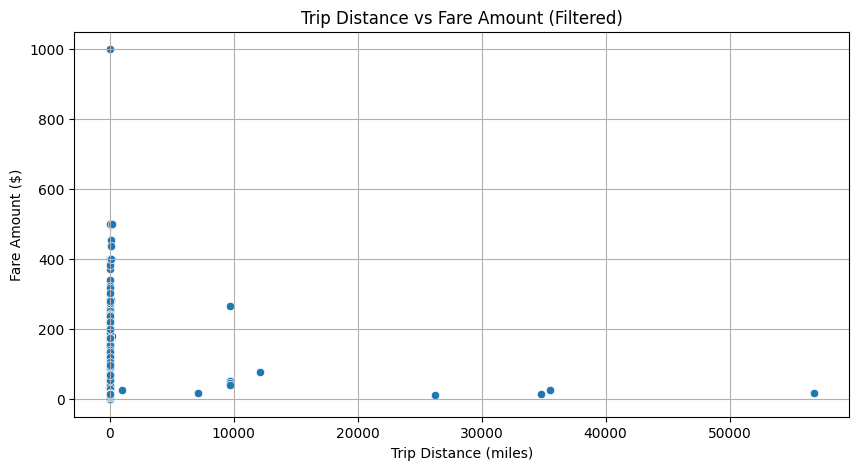

In [30]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df[df['fare_amount'] <= 1000], x='trip_distance', y='fare_amount')
plt.title('Trip Distance vs Fare Amount (Filtered)')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True)
plt.show()


- We can see for trip_distance < 0.1 and fare > 300, which is totally unfare and also we are observing Entries where trip_distance and fare_amount are 0 

In [31]:
# Dropping these rows
df = df[~((df['trip_distance'] < 0.1) & (df['fare_amount'] > 300))]
print("Dropped invalid high-fare short-distance trips.")


Dropped invalid high-fare short-distance trips.


In [32]:
# Entries where trip_distance and fare_amount are 0 but the pickup and dropoff zones are different 
zero_distance_fare_diff_zone = df[
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
]

print("Suspicious zero distance + zero fare, but different zones:", zero_distance_fare_diff_zone.shape[0])
zero_distance_fare_diff_zone[['trip_distance', 'fare_amount', 'PULocationID', 'DOLocationID']].head()


Suspicious zero distance + zero fare, but different zones: 9


,trip_distance,fare_amount,PULocationID,DOLocationID
6150,0.0,0.0,70,138
16911,0.0,0.0,262,230
80512,0.0,0.0,231,264
86478,0.0,0.0,43,237
99945,0.0,0.0,138,264


In [33]:
# Dropping the rows
df = df[~(
    (df['trip_distance'] == 0) &
    (df['fare_amount'] == 0) &
    (df['PULocationID'] != df['DOLocationID'])
)]
print("Removed rows where trip_distance & fare are 0 but PULocationID is not equal with DOLocationID.")
df.shape

Removed rows where trip_distance & fare are 0 but PULocationID is not equal with DOLocationID.


(299965, 18)

In [34]:
# Entries where trip_distance is more than 250 miles
very_long_trips = df[df['trip_distance'] > 250]
print("Trips with distance > 250 miles:", very_long_trips.shape[0])
very_long_trips[['trip_distance', 'fare_amount', 'total_amount', 'PULocationID', 'DOLocationID']].head()

Trips with distance > 250 miles: 11


,trip_distance,fare_amount,total_amount,PULocationID,DOLocationID
73790,9717.11,264.80,271.30,216,265
111439,35482.69,25.91,34.40,224,33
141521,34804.51,14.45,22.14,263,151
175001,7094.16,18.81,20.31,75,42
178900,969.10,25.50,27.00,258,265


In [35]:
df = df[~(df['trip_distance'] > 250)]
print("Removed trips with distance > 250 miles.")

Removed trips with distance > 250 miles.


In [36]:
invalid_payment_rows = df[df['payment_type'] == 0]
print("Invalid payment_type :", invalid_payment_rows.shape[0])
print(df['payment_type'].value_counts())

Invalid payment_type : 10210
payment_type
1    236218
2     49938
0     10210
4      2159
3      1429
Name: count, dtype: int64


In [37]:
payment_labels = {
    1: 'Credit card',
    2: 'Cash',
    3: 'No charge',
    4: 'Dispute',
    5: 'Unknown',
    6: 'Voided trip'
}
payment_percent = df['payment_type'].value_counts(normalize=True) * 100
payment_percent.index = payment_percent.index.map(payment_labels)
round(payment_percent,2)

payment_type
Credit card    78.75
Cash           16.65
NaN             3.40
Dispute         0.72
No charge       0.48
Name: proportion, dtype: float64

In [38]:
df = df[df['payment_type'] != 0]
print("Removed rows with invalid payment_type, Current df shape :", df.shape)
print('done')

Removed rows with invalid payment_type, Current df shape : (289744, 18)
done


In [39]:
# more outliers
df[df['tpep_dropoff_datetime'] < df['tpep_pickup_datetime']]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
21357,1,2023-07-29 11:45:00,2023-07-29 11:29:01,1.0,3.60,99.0,213,32,1,24.5,0.0,0.5,0.00,0.0,1.0,26.00,0.0,0.0
66060,2,2023-11-05 01:59:19,2023-11-05 01:12:55,2.0,2.78,1.0,114,233,1,15.6,1.0,0.5,4.12,0.0,1.0,24.72,2.5,0.0
210563,2,2023-11-05 01:58:50,2023-11-05 01:13:41,1.0,3.99,1.0,148,37,1,19.1,1.0,0.5,2.00,0.0,1.0,26.10,2.5,0.0
241406,1,2023-08-31 11:40:00,2023-08-31 11:24:26,1.0,1.80,99.0,263,41,1,19.5,0.0,0.5,0.00,0.0,1.0,21.00,0.0,0.0
247873,1,2023-11-05 01:50:53,2023-11-05 01:02:37,1.0,3.50,1.0,107,263,1,16.3,3.5,0.5,1.00,0.0,1.0,22.30,2.5,0.0
285292,1,2023-11-05 01:52:31,2023-11-05 01:03:17,2.0,2.10,1.0,50,239,1,12.8,3.5,0.5,3.56,0.0,1.0,21.36,2.5,0.0
292768,2,2023-11-05 01:58:38,2023-11-05 01:08:06,1.0,1.84,1.0,238,263,1,12.1,1.0,0.5,3.42,0.0,1.0,20.52,2.5,0.0


In [40]:
# Dropping the all logically impossible trips
df = df[df['tpep_pickup_datetime'] <= df['tpep_dropoff_datetime']]
print('Dropped..')

Dropped..


In [41]:
# More outliers on fare_amount and trip_distance
df[df['trip_distance'] >= 75]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
39055,2,2023-01-12 16:32:18,2023-01-12 18:50:03,1.0,87.53,4.0,132,265,2,497.2,2.5,0.0,0.00,6.55,1.0,508.50,0.0,1.25
245414,2,2023-09-01 15:34:44,2023-09-01 19:05:57,1.0,163.52,5.0,132,265,2,500.0,0.0,0.0,0.00,13.94,1.0,516.69,0.0,1.75
276796,2,2023-12-18 10:52:49,2023-12-18 13:40:43,1.0,187.35,5.0,246,265,1,180.0,0.0,0.0,0.15,12.75,1.0,193.90,0.0,0.00
288097,2,2023-10-22 13:15:00,2023-10-22 16:34:16,2.0,81.54,5.0,163,88,1,400.0,0.0,0.0,80.70,0.00,1.0,484.20,2.5,0.00


In [42]:
df[df['fare_amount'] > 500]

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,extra,mta_tax,tip_amount,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee
63510,1,2023-09-05 10:16:13,2023-09-05 10:20:56,1.0,0.7,1.0,249,90,2,143163.45,2.5,0.5,0.0,0.0,1.0,143167.45,2.5,0.0


In [43]:
# Dropping rows greater than 75 miles trip_distance and greater than 500 USD
df = df[(df['trip_distance'] < 75) & (df['fare_amount'] <= 500)]
print("Dropping rows greater than 75 miles trip_distance and greater than 500 USD")

Dropping rows greater than 75 miles trip_distance and greater than 500 USD


In [102]:
df.shape

(289711, 28)

In [ ]:
# Do any columns need standardising?


- All distance measurements consistently use miles (appropriate for NYC taxi operations) 

- All monetary values consistently use USD (natural currency for NYC market) 

- Temporal data already standardized in proper datetime format across pickup/dropoff columns

## **3** Exploratory Data Analysis
<font color = red>[90 marks]</font> <br>

In [45]:
df.columns.tolist()

['VendorID',
 'tpep_pickup_datetime',
 'tpep_dropoff_datetime',
 'passenger_count',
 'trip_distance',
 'RatecodeID',
 'PULocationID',
 'DOLocationID',
 'payment_type',
 'fare_amount',
 'extra',
 'mta_tax',
 'tip_amount',
 'tolls_amount',
 'improvement_surcharge',
 'total_amount',
 'congestion_surcharge',
 'airport_fee']

#### **3.1** General EDA: Finding Patterns and Trends
<font color = red>[40 marks]</font> <br>

**3.1.1** <font color = red>[3 marks]</font> <br>
Categorise the varaibles into Numerical or Categorical.
* `VendorID`: Categorical
* `tpep_pickup_datetime`:Categorical
* `tpep_dropoff_datetime`:Categorical
* `passenger_count`:Numerical
* `trip_distance`:Numerical
* `RatecodeID`:Categorical
* `PULocationID`:Categorical
* `DOLocationID`:Categorical
* `payment_type`:Categorical
* `pickup_hour`:Categorical
* `trip_duration`:Numerical


The following monetary parameters belong in the same category, is it categorical or numerical?


* `fare_amount`
* `extra`
* `mta_tax`
* `tip_amount`
* `tolls_amount`
* `improvement_surcharge`
* `total_amount`
* `congestion_surcharge`
* `airport_fee`

#### Answer : `Numerical`

##### Temporal Analysis

**3.1.2** <font color = red>[5 marks]</font> <br>
Analyse the distribution of taxi pickups by hours, days of the week, and months.

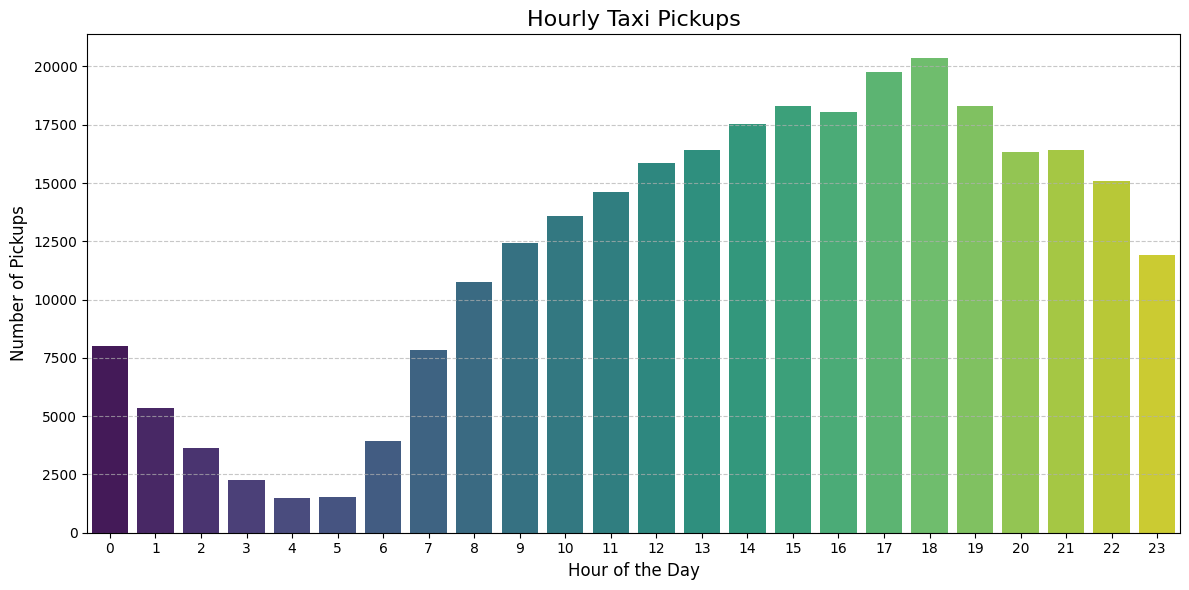

In [46]:
# Find and show the hourly trends in taxi pickups
df['pickup_hour'] = df['tpep_pickup_datetime'].dt.hour

# Group by hour and count number of pickups
hourly_pickups = df['pickup_hour'].value_counts().sort_index()

# Plot the trend
plt.figure(figsize=(12, 6))
sns.barplot(x=hourly_pickups.index, y=hourly_pickups.values, palette='viridis')
plt.title('Hourly Taxi Pickups', fontsize=16)
plt.xlabel('Hour of the Day', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


In [47]:
# Find and show the daily trends in taxi pickups (days of the week)
df['pickup_day'] = df['tpep_pickup_datetime'].dt.dayofweek
day_names = {
    0: 'Monday', 1: 'Tuesday', 2: 'Wednesday', 3: 'Thursday',
    4: 'Friday', 5: 'Saturday', 6: 'Sunday'
}
df['pickup_day_by_name'] = df['pickup_day'].map(day_names)
daily_pickups = df['pickup_day_by_name'].value_counts()
print(daily_pickups)


pickup_day_by_name
Thursday     45961
Wednesday    44626
Friday       42805
Saturday     41969
Tuesday      41847
Sunday       36295
Monday       36229
Name: count, dtype: int64


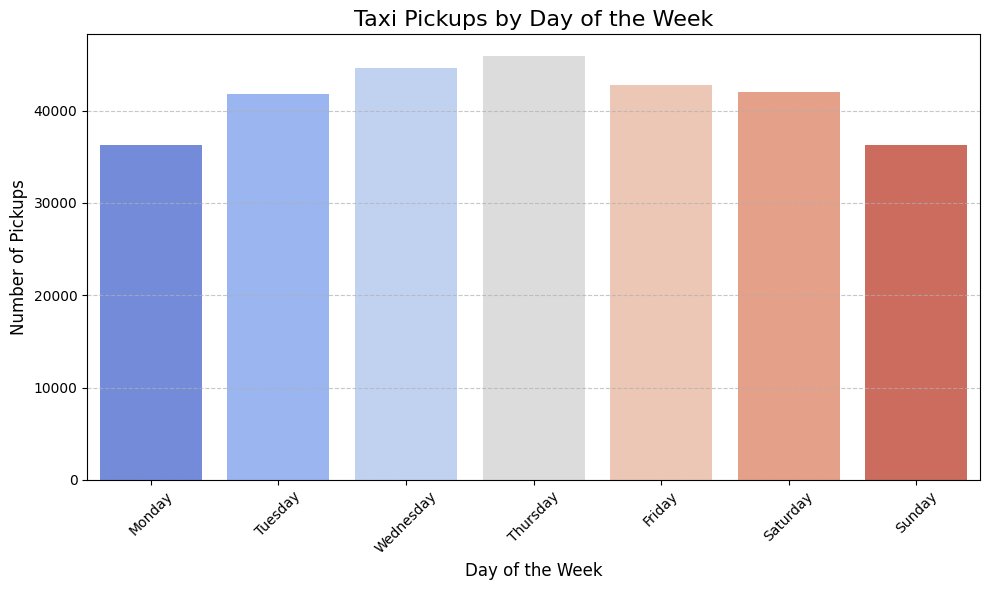

In [48]:
daily_pickups = daily_pickups.reindex(
    ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.figure(figsize=(10, 6))
sns.barplot(x=daily_pickups.index, y=daily_pickups.values, palette='coolwarm')
plt.title('Taxi Pickups by Day of the Week', fontsize=16)
plt.xlabel('Day of the Week', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

In [49]:
# Show the monthly trends in pickups
df['pickup_month'] = df['tpep_pickup_datetime'].dt.month
df['pickup_month_name'] = df['tpep_pickup_datetime'].dt.strftime('%B')
df['pickup_month_name'].value_counts()

pickup_month_name
May          26778
October      26468
March        25958
November     25258
June         25149
December     24852
April        24838
January      23565
February     22266
July         22264
August       21201
September    21135
Name: count, dtype: int64

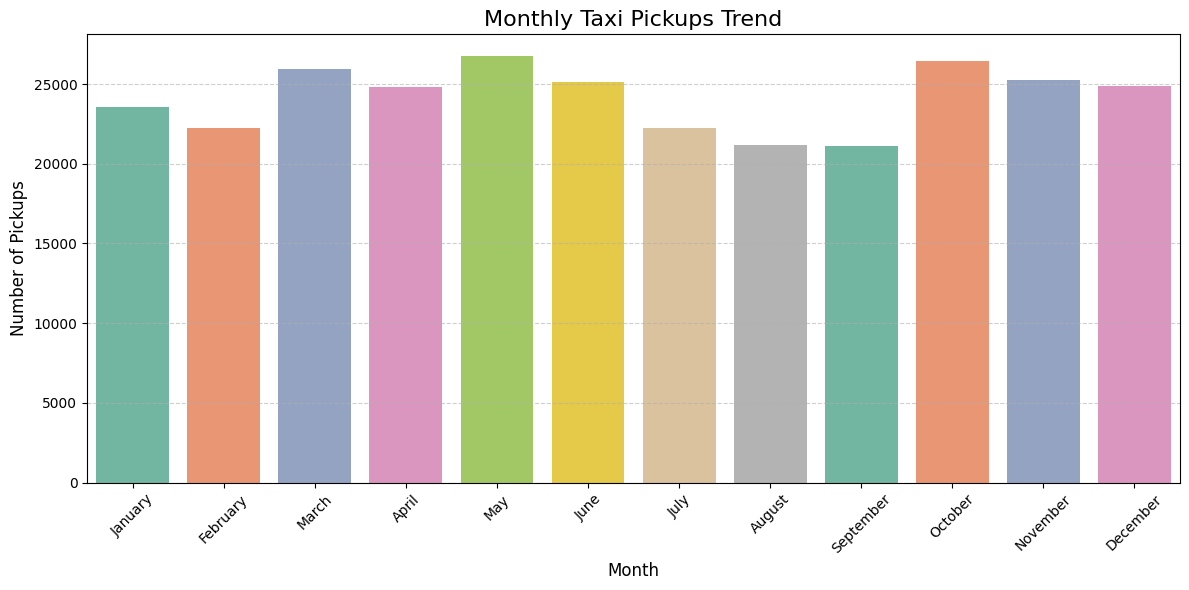

In [50]:
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']

monthly_pickups = df['pickup_month_name'].value_counts().reindex(month_order)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=monthly_pickups.index, y=monthly_pickups.values, palette='Set2')
plt.title('Monthly Taxi Pickups Trend', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Number of Pickups', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

##### Financial Analysis

Take a look at the financial parameters like `fare_amount`, `tip_amount`, `total_amount`, and also `trip_distance`. Do these contain zero/negative values?

In [51]:
# Analyse the above parameters
cols = ['fare_amount','tip_amount','total_amount','trip_distance']
for col in cols:
    zero_counts = (df[col] == 0).sum()
    negative_counts = (df[col] < 0).sum()
    print(f'{col} : {zero_counts} zero values, {negative_counts} negative values')


fare_amount : 71 zero values, 0 negative values
tip_amount : 64818 zero values, 0 negative values
total_amount : 35 zero values, 0 negative values
trip_distance : 3610 zero values, 0 negative values


In [52]:
#Handling fare_amount zero values
zero_fare_rows = df[df['fare_amount'] == 0]
print(zero_fare_rows['payment_type'].value_counts())
# Drop rows where fare is 0 and payment_type is invalid/suspicious
df = df[~((df['fare_amount'] == 0) & (df['payment_type'].isin([0, 1, 2])))]
print(f"Remaining rows: {df.shape[0]}")

payment_type
1    22
4    19
2    18
3    12
Name: count, dtype: int64
Remaining rows: 289692


Do you think it is beneficial to create a copy DataFrame leaving out the zero values from these?

- Yes, it is beneficial to create a copy of the DataFrame excluding zero or invalid values, especially when performing targeted analysis like calculating averages, detecting outliers, or building models.

- Zero values in columns like fare_amount, trip_distance, or total_amount often indicate anomalies (e.g., data entry errors, disputed rides, or voided transactions). Keeping them in the primary analysis may skew statistics and produce misleading results.

- In this case, I reviewed the zero-value rows and chose to drop those with clearly invalid combinations — such as fare_amount = 0 with payment_type set to Credit Card or Cash — ensuring both accuracy and integrity in the analysis.

**3.1.3** <font color = red>[2 marks]</font> <br>
Filter out the zero values from the above columns.

**Note:** The distance might be 0 in cases where pickup and drop is in the same zone. Do you think it is suitable to drop such cases of zero distance?

In [53]:
# Create a df with non zero entries for the selected parameters.
df_nonzero = df[~(
    (df['fare_amount'] == 0) |
    (df['tip_amount'] == 0) |
    (df['total_amount'] == 0) |
    ((df['trip_distance'] == 0) & (df['fare_amount'] == 0))
)].copy()
print("Dataframe with nonzero values created..")
df_nonzero.head()

Dataframe with nonzero values created..


,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,tolls_amount,improvement_surcharge,total_amount,congestion_surcharge,airport_fee,pickup_hour,pickup_day,pickup_day_by_name,pickup_month,pickup_month_name
0,2,2023-02-14 19:15:19,2023-02-14 19:43:42,1.0,4.09,1.0,229,231,1,25.4,...,0.0,1.0,38.28,2.5,0.0,19,1,Tuesday,2,February
1,2,2023-02-17 20:04:50,2023-02-17 20:15:17,1.0,2.62,1.0,142,262,1,13.5,...,0.0,1.0,25.00,2.5,0.0,20,4,Friday,2,February
2,2,2023-05-12 02:57:41,2023-05-12 03:02:01,1.0,1.00,1.0,186,230,1,7.2,...,0.0,1.0,14.64,2.5,0.0,2,4,Friday,5,May
3,2,2023-06-28 18:07:39,2023-06-28 18:10:43,1.0,0.54,1.0,249,249,1,5.1,...,0.0,1.0,13.92,2.5,0.0,18,2,Wednesday,6,June
4,2,2023-10-21 22:38:34,2023-10-21 22:58:15,1.0,1.28,1.0,249,79,1,12.8,...,0.0,1.0,21.36,2.5,0.0,22,5,Saturday,10,October


**3.1.4** <font color = red>[3 marks]</font> <br>
Analyse the monthly revenue (`total_amount`) trend

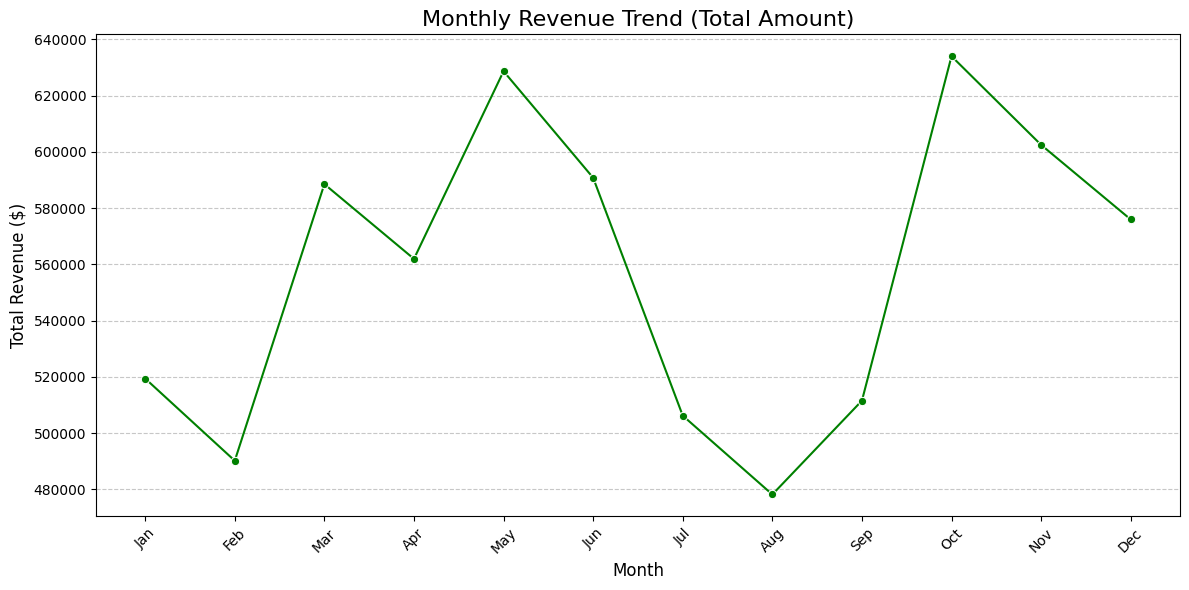

In [54]:
# Group by pickup month and sum total revenue
df_nonzero['pickup_month'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime']).dt.to_period('M')
monthly_revenue = df_nonzero.groupby('pickup_month')['total_amount'].sum()
all_months = pd.period_range(start='2023-01', end='2023-12', freq='M')
monthly_revenue = monthly_revenue.reindex(all_months, fill_value=0)

#Convert index to month names for better display 
monthly_revenue.index = monthly_revenue.index.strftime('%b')

# Plot
plt.figure(figsize=(12, 6))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='green')
plt.title('Monthly Revenue Trend (Total Amount)', fontsize=16)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Total Revenue ($)', fontsize=12)
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()



**3.1.5** <font color = red>[3 marks]</font> <br>
Show the proportion of each quarter of the year in the revenue

In [55]:
# Calculate proportion of each quarter
df_nonzero['pickup_quater'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime']).dt.to_period('Q')
quarterly_revenue = df_nonzero.groupby('pickup_quater')['total_amount'].sum()
quarterly_proportion = (quarterly_revenue/ quarterly_revenue.sum()) * 100
print(round(quarterly_proportion,2))

pickup_quater
2023Q1    23.90
2023Q2    26.64
2023Q3    22.37
2023Q4    27.10
Freq: Q-DEC, Name: total_amount, dtype: float64


**3.1.6** <font color = red>[3 marks]</font> <br>
Visualise the relationship between `trip_distance` and `fare_amount`. Also find the correlation value for these two.

**Hint:** You can leave out the trips with trip_distance = 0

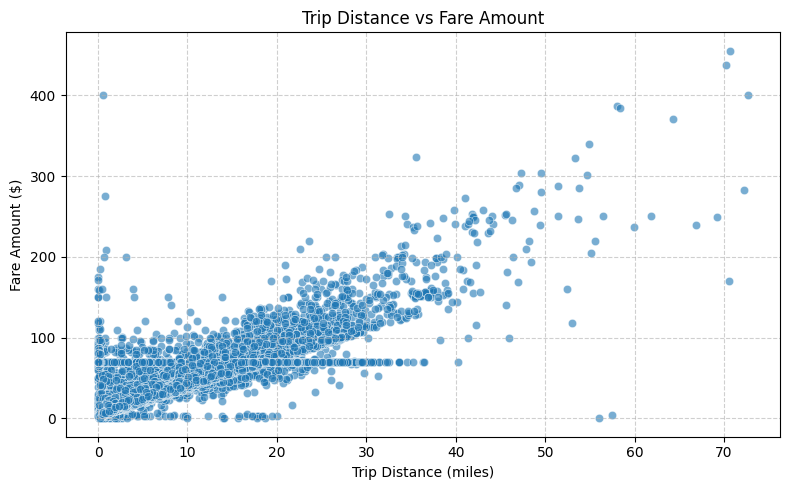

In [56]:
# Show how trip fare is affected by distance
df_nonzero_distance = df[df['trip_distance'] > 0]
plt.figure(figsize=(8, 5))
sns.scatterplot(
    data=df_nonzero_distance,
    x='trip_distance',
    y='fare_amount',
    alpha=0.6
)
plt.title('Trip Distance vs Fare Amount')
plt.xlabel('Trip Distance (miles)')
plt.ylabel('Fare Amount ($)')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

0.9458261535993271


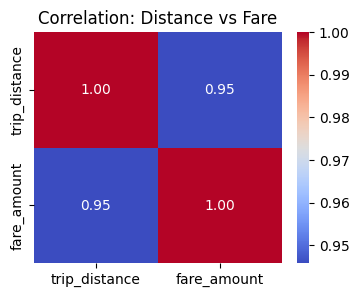

In [57]:
corr_distance_fare = df_nonzero_distance['trip_distance'].corr(df_nonzero_distance['fare_amount'])
print(corr_distance_fare)
plt.figure(figsize=(4, 3))
sns.heatmap(
    df_nonzero_distance[['trip_distance', 'fare_amount']].corr(),
    annot=True, cmap='coolwarm', fmt=".2f"
)
plt.title('Correlation: Distance vs Fare')
plt.show()

**3.1.7** <font color = red>[5 marks]</font> <br>
Find and visualise the correlation between:
1. `fare_amount` and trip duration (pickup time to dropoff time)
2. `fare_amount` and `passenger_count`
3. `tip_amount` and `trip_distance`

Correlation between fare amount and trip duration is: 0.32


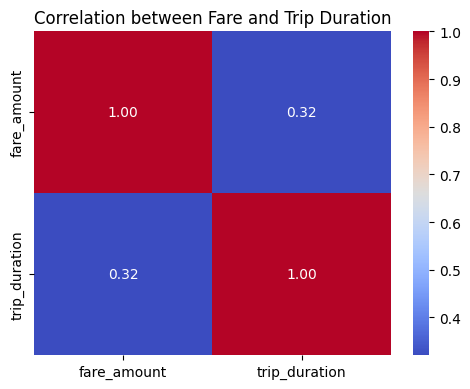

In [58]:
# Show relationship between fare and trip duration
# creating trip duration column
df_nonzero['tpep_pickup_datetime'] = pd.to_datetime(df_nonzero['tpep_pickup_datetime'])
df_nonzero['tpep_dropoff_datetime'] = pd.to_datetime(df_nonzero['tpep_dropoff_datetime'])
df_nonzero['trip_duration'] = df_nonzero['tpep_dropoff_datetime'] - df_nonzero['tpep_pickup_datetime']
#correlation
corr_fare_trip_duration = df_nonzero['fare_amount'].corr(df_nonzero['trip_duration'])
print(f'Correlation between fare amount and trip duration is: {corr_fare_trip_duration:.2f}')

plt.figure(figsize=(5, 4))
sns.heatmap(df_nonzero[['fare_amount', 'trip_duration']].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation between Fare and Trip Duration')
plt.tight_layout()
plt.show()

Correlation between fare amount and passenger count is: 0.04


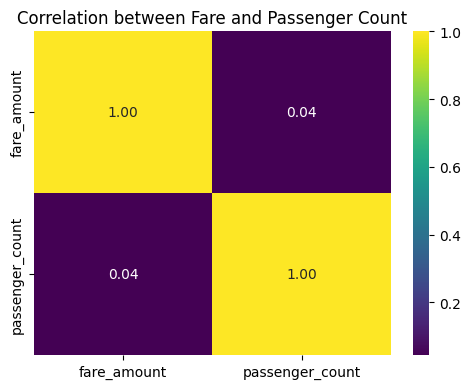

In [59]:
# Show relationship between fare and number of passengers
corr_fare_passenger = df_nonzero['fare_amount'].corr(df_nonzero['passenger_count'])
print(f"Correlation between fare amount and passenger count is: {corr_fare_passenger:.2f}")
plt.figure(figsize=(5, 4))
sns.heatmap(df_nonzero[['fare_amount', 'passenger_count']].corr(), annot=True, cmap='viridis', fmt=".2f")
plt.title('Correlation between Fare and Passenger Count')
plt.tight_layout()
plt.show()


Correlation between tip amount and trip distance is: 0.78


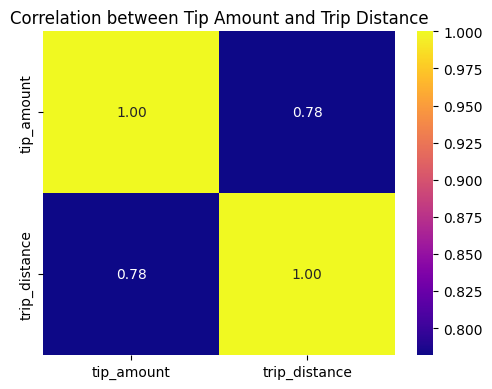

In [60]:
# Show relationship between tip and trip distance
corr_tip_distance = df_nonzero['tip_amount'].corr(df_nonzero['trip_distance'])
print(f"Correlation between tip amount and trip distance is: {corr_tip_distance:.2f}")

plt.figure(figsize=(5, 4))
sns.heatmap(df_nonzero[['tip_amount', 'trip_distance']].corr(), annot=True, cmap='plasma', fmt=".2f")
plt.title('Correlation between Tip Amount and Trip Distance')
plt.tight_layout()
plt.show()


**3.1.8** <font color = red>[3 marks]</font> <br>
Analyse the distribution of different payment types (`payment_type`)

In [61]:
# Analyse the distribution of different payment types (payment_type).
df_payment = df[df['payment_type'].isin({1,2,3,4})].copy()
payment_labels = {
    1 : 'Credit card',
    2 : 'Cash',
    3 : 'No charge',
    4 : 'Dispute'
}
df_payment['payment_label'] = df_payment['payment_type'].map(payment_labels)

payment_counts = df_payment['payment_label'].value_counts()
payment_percent = df_payment['payment_label'].value_counts(normalize = True) * 100
print("Payment Type Distribution (Counts):\n", payment_counts)
print("\nPayment Type Distribution (Percentages):\n", round(payment_percent, 2))

Payment Type Distribution (Counts):
 payment_label
Credit card    236187
Cash            49917
Dispute          2159
No charge        1429
Name: count, dtype: int64

Payment Type Distribution (Percentages):
 payment_label
Credit card    81.53
Cash           17.23
Dispute         0.75
No charge       0.49
Name: proportion, dtype: float64


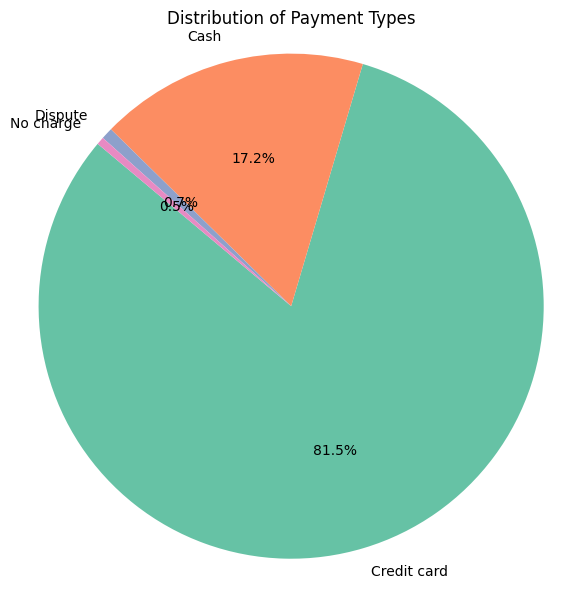

In [62]:
plt.figure(figsize=(6, 6))
plt.pie(payment_counts, labels=payment_counts.index, autopct='%1.1f%%', startangle=140, colors=sns.color_palette('Set2'),labeldistance=1.1)
plt.title('Distribution of Payment Types')
plt.axis('equal')
plt.tight_layout()
plt.show()

- 1= Credit card
- 2= Cash
- 3= No charge
- 4= Dispute



##### Geographical Analysis

For this, you have to use the *taxi_zones.shp* file from the *taxi_zones* folder.

There would be multiple files inside the folder (such as *.shx, .sbx, .sbn* etc). You do not need to import/read any of the files other than the shapefile, *taxi_zones.shp*.

Do not change any folder structure - all the files need to be present inside the folder for it to work.

The folder structure should look like this:
```
Taxi Zones
|- taxi_zones.shp.xml
|- taxi_zones.prj
|- taxi_zones.sbn
|- taxi_zones.shp
|- taxi_zones.dbf
|- taxi_zones.shx
|- taxi_zones.sbx

 ```

 You only need to read the `taxi_zones.shp` file. The *shp* file will utilise the other files by itself.

We will use the *GeoPandas* library for geopgraphical analysis
```
import geopandas as gpd
```

More about geopandas and shapefiles: [About](https://geopandas.org/en/stable/about.html)


Reading the shapefile is very similar to *Pandas*. Use `gpd.read_file()` function to load the data (*taxi_zones.shp*) as a GeoDataFrame. Documentation: [Reading and Writing Files](https://geopandas.org/en/stable/docs/user_guide/io.html)

In [63]:
#!pip install geopandas

**3.1.9** <font color = red>[2 marks]</font> <br>
Load the shapefile and display it.

In [64]:
# import geopandas as gpd
import geopandas as gpd

# Read the shapefile using geopandas
zones = gpd.read_file("/Users/professorx/Documents/PythonUpgrad/EDA Assignment/Starter Notebook - EDA NYC Taxi/Datasets and Dictionary/taxi_zones/taxi_zones.shp") # read the .shp file using gpd
zones.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19..."
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343..."
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2..."
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20..."
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144..."


Now, if you look at the DataFrame created, you will see columns like: `OBJECTID`,`Shape_Leng`, `Shape_Area`, `zone`, `LocationID`, `borough`, `geometry`.
<br><br>

Now, the `locationID` here is also what we are using to mark pickup and drop zones in the trip records.

The geometric parameters like shape length, shape area and geometry are used to plot the zones on a map.

This can be easily done using the `plot()` method.

<class 'geopandas.geodataframe.GeoDataFrame'>
RangeIndex: 263 entries, 0 to 262
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   OBJECTID    263 non-null    int32   
 1   Shape_Leng  263 non-null    float64 
 2   Shape_Area  263 non-null    float64 
 3   zone        263 non-null    object  
 4   LocationID  263 non-null    int32   
 5   borough     263 non-null    object  
 6   geometry    263 non-null    geometry
dtypes: float64(2), geometry(1), int32(2), object(2)
memory usage: 12.5+ KB
None


<Axes: >

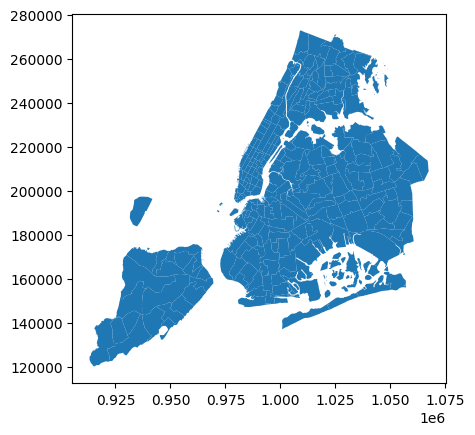

In [65]:
print(zones.info())
zones.plot()

Now, you have to merge the trip records and zones data using the location IDs.



**3.1.10** <font color = red>[3 marks]</font> <br>
Merge the zones data into trip data using the `locationID` and `PULocationID` columns.

In [66]:
# Merge zones and trip records using locationID and PULocationID
if 'zone' not in df.columns:
    # Make sure IDs are int
    df['PULocationID'] = df['PULocationID'].astype(int)
    zones['LocationID'] = zones['LocationID'].astype(int)
    
    df = df.merge(
        zones[['LocationID', 'zone', 'borough']],
        left_on='PULocationID',
        right_on='LocationID',
        how='left'
    )
else:
    print("Zones already merged — skipping merge.")
df.head()

,VendorID,tpep_pickup_datetime,tpep_dropoff_datetime,passenger_count,trip_distance,RatecodeID,PULocationID,DOLocationID,payment_type,fare_amount,...,congestion_surcharge,airport_fee,pickup_hour,pickup_day,pickup_day_by_name,pickup_month,pickup_month_name,LocationID,zone,borough
0,2,2023-02-14 19:15:19,2023-02-14 19:43:42,1.0,4.09,1.0,229,231,1,25.4,...,2.5,0.0,19,1,Tuesday,2,February,229.0,Sutton Place/Turtle Bay North,Manhattan
1,2,2023-02-17 20:04:50,2023-02-17 20:15:17,1.0,2.62,1.0,142,262,1,13.5,...,2.5,0.0,20,4,Friday,2,February,142.0,Lincoln Square East,Manhattan
2,2,2023-05-12 02:57:41,2023-05-12 03:02:01,1.0,1.00,1.0,186,230,1,7.2,...,2.5,0.0,2,4,Friday,5,May,186.0,Penn Station/Madison Sq West,Manhattan
3,2,2023-06-28 18:07:39,2023-06-28 18:10:43,1.0,0.54,1.0,249,249,1,5.1,...,2.5,0.0,18,2,Wednesday,6,June,249.0,West Village,Manhattan
4,2,2023-10-21 22:38:34,2023-10-21 22:58:15,1.0,1.28,1.0,249,79,1,12.8,...,2.5,0.0,22,5,Saturday,10,October,249.0,West Village,Manhattan


**3.1.11** <font color = red>[3 marks]</font> <br>
Group data by location IDs to find the total number of trips per location ID

In [67]:
# Group data by location and calculate the number of trips
pickup_counts = df.groupby('PULocationID').size().reset_index(name='trip_count')
print(pickup_counts)


     PULocationID  trip_count
0               1          32
1               3          10
2               4         302
3               5           1
4               6           6
..            ...         ...
233           261        1529
234           262        3785
235           263        5509
236           264        2860
237           265         161

[238 rows x 2 columns]


**3.1.12** <font color = red>[2 marks]</font> <br>
Now, use the grouped data to add number of trips to the GeoDataFrame.

We will use this to plot a map of zones showing total trips per zone.

In [68]:
# Merge trip counts back to the zones GeoDataFrame
zones_with_trips = zones.merge(
    pickup_counts,
    left_on='LocationID',
    right_on='PULocationID',
    how='left'
)
zones_with_trips.head()

,OBJECTID,Shape_Leng,Shape_Area,zone,LocationID,borough,geometry,PULocationID,trip_count
0,1,0.116357,0.000782,Newark Airport,1,EWR,"POLYGON ((933100.918 192536.086, 933091.011 19...",1.0,32.0
1,2,0.433470,0.004866,Jamaica Bay,2,Queens,"MULTIPOLYGON (((1033269.244 172126.008, 103343...",NaN,NaN
2,3,0.084341,0.000314,Allerton/Pelham Gardens,3,Bronx,"POLYGON ((1026308.77 256767.698, 1026495.593 2...",3.0,10.0
3,4,0.043567,0.000112,Alphabet City,4,Manhattan,"POLYGON ((992073.467 203714.076, 992068.667 20...",4.0,302.0
4,5,0.092146,0.000498,Arden Heights,5,Staten Island,"POLYGON ((935843.31 144283.336, 936046.565 144...",5.0,1.0


In [69]:
# before mapping -- NaN values to Zeros
zones_with_trips.describe(percentiles=[0.01,0.1,0.25,0.5,0.75,0.8,0.99])


,OBJECTID,Shape_Leng,Shape_Area,LocationID,PULocationID,trip_count
count,263.000000,263.000000,263.000000,263.000000,237.000000,237.000000
mean,132.000000,0.094269,0.000402,131.984791,132.548523,1209.822785
std,76.065761,0.054594,0.000482,76.073787,76.440314,2824.386226
min,1.000000,0.014306,0.000006,1.000000,1.000000,1.000000
1%,3.620000,0.023376,0.000023,3.620000,4.360000,1.000000
10%,27.200000,0.036925,0.000068,27.200000,27.200000,4.000000
25%,66.500000,0.054722,0.000133,66.500000,66.000000,7.000000
50%,132.000000,0.084341,0.000268,132.000000,135.000000,20.000000
75%,197.500000,0.119488,0.000480,197.500000,198.000000,213.000000
80%,210.600000,0.131153,0.000547,210.600000,211.800000,1147.200000


The next step is creating a color map (choropleth map) showing zones by the number of trips taken.

Again, you can use the `zones.plot()` method for this. [Plot Method GPD](https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html#geopandas.GeoDataFrame.plot)

But first, you need to define the figure and axis for the plot.

`fig, ax = plt.subplots(1, 1, figsize = (12, 10))`

This function creates a figure (fig) and a single subplot (ax)

---

After setting up the figure and axis, we can proceed to plot the GeoDataFrame on this axis. This is done in the next step where we use the plot method of the GeoDataFrame.

You can define the following parameters in the `zones.plot()` method:
```
column = '',
ax = ax,
legend = True,
legend_kwds = {'label': "label", 'orientation': "<horizontal/vertical>"}
```

To display the plot, use `plt.show()`.

**3.1.13** <font color = red>[3 marks]</font> <br>
Plot a color-coded map showing zone-wise trips

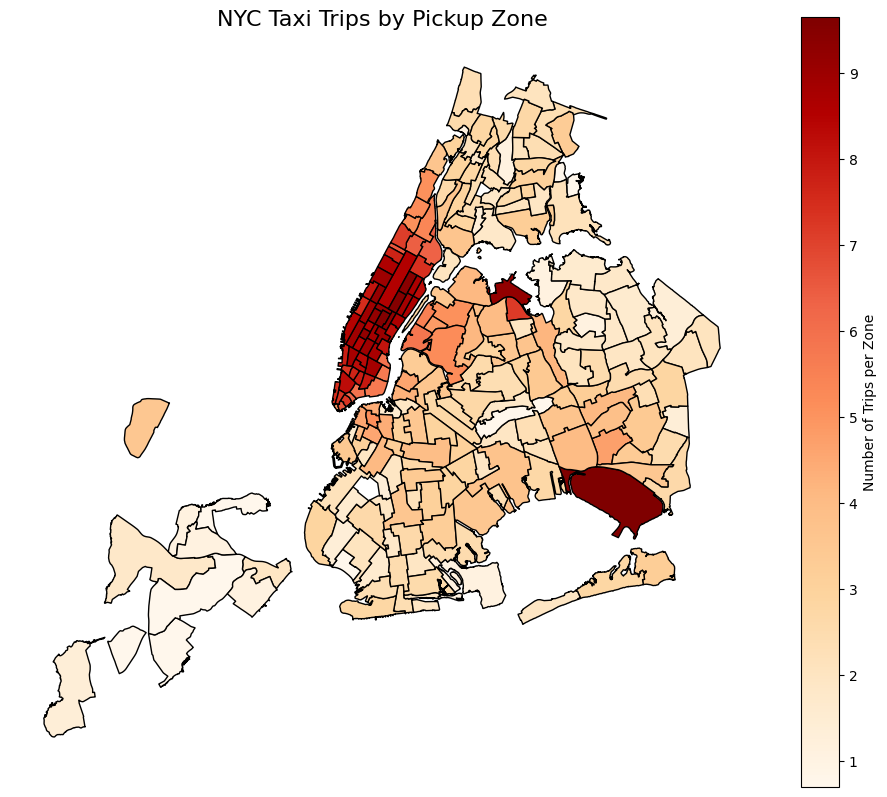

In [105]:
# Define figure and axis
fig, ax = plt.subplots(1, 1, figsize=(12, 10))

# zones_with_trips.plot(
#     column='trip_count',          
#     ax=ax,                        
#     legend=True,                  
#     legend_kwds={
#         'label': "Number of Trips per Zone",
#         'orientation': "horizontal"  
#     },
#     cmap='OrRd',                  
#     edgecolor='black',            
#     linewidth=0.5                  
# )
zones_with_trips['log_trip_count'] = np.log1p(zones_with_trips['trip_count'])
zones_with_trips.plot(
    column='log_trip_count',
    ax=ax,
    legend=True,
    legend_kwds={
        'label': "Number of Trips per Zone",
        'orientation': "vertical"  
    },
    cmap='OrRd',
    edgecolor='black'
)

plt.title("NYC Taxi Trips by Pickup Zone", fontsize=16)
plt.axis('off')  
plt.show()


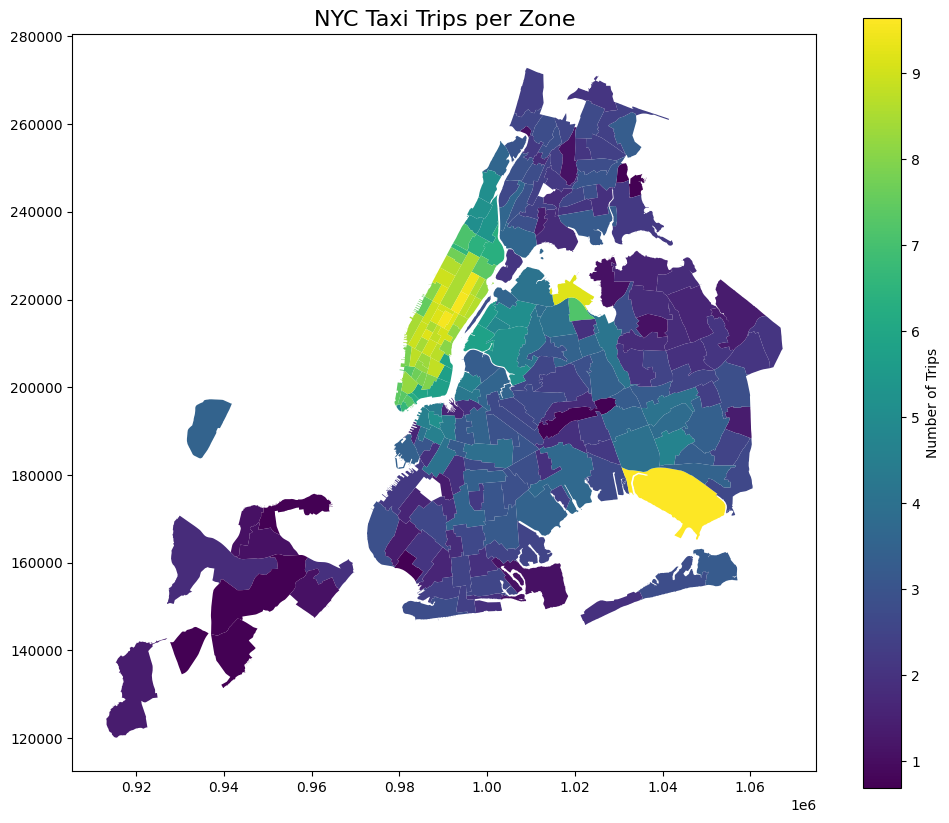

In [106]:
# can you try displaying the zones DF sorted by the number of trips?
zones_sorted = zones_with_trips.sort_values(by='trip_count', ascending=False)
fig, ax = plt.subplots(1, 1, figsize=(12, 10))
zones_with_trips.plot(
    column='log_trip_count',
    ax=ax,
    legend=True,
    cmap='viridis',
    legend_kwds={'label': "Number of Trips", 'orientation': "vertical"}
)
ax.set_title("NYC Taxi Trips per Zone", fontsize=16)
plt.show()

Here we have completed the temporal, financial and geographical analysis on the trip records.

**Compile your findings from general analysis below:**

You can consider the following points:

* Busiest hours, days and months
* Trends in revenue collected
* Trends in quarterly revenue
* How fare depends on trip distance, trip duration and passenger counts
* How tip amount depends on trip distance
* Busiest zones


#### **3.2** Detailed EDA: Insights and Strategies
<font color = red>[50 marks]</font> <br>

Having performed basic analyses for finding trends and patterns, we will now move on to some detailed analysis focussed on operational efficiency, pricing strategies, and customer experience.

##### Operational Efficiency

Analyze variations by time of day and location to identify bottlenecks or inefficiencies in routes

**3.2.1** <font color = red>[3 marks]</font> <br>
Identify slow routes by calculating the average time taken by cabs to get from one zone to another at different hours of the day.

Speed on a route *X* for hour *Y* = (*distance of the route X / average trip duration for hour Y*)

In [72]:
# Find routes which have the slowest speeds at different times of the day

In [73]:
# creating column on trip_duration_min
df['trip_duration_min'] = (df['tpep_dropoff_datetime'] - df['tpep_pickup_datetime']).dt.total_seconds() / 60

In [74]:
# compute average speed for each route for hour
route_hour_stats = (
    df.groupby(['PULocationID', 'DOLocationID', 'pickup_hour'])
    .agg(
        avg_distance=('trip_distance', 'mean'),
        avg_duration_min=('trip_duration_min', 'mean')
    )
    .reset_index()
)
# check for zeros
route_hour_stats = route_hour_stats[route_hour_stats['avg_duration_min'] > 0]

# Calculate average speed
route_hour_stats['avg_speed_mph'] = route_hour_stats['avg_distance'] / (route_hour_stats['avg_duration_min'] / 60)

route_hour_stats.head()

,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration_min,avg_speed_mph
0,1,1,4,0.000,0.766667,0.0
1,1,1,6,1.025,3.000000,20.5
2,1,1,7,0.000,0.316667,0.0
3,1,1,10,0.000,0.133333,0.0
4,1,1,13,0.000,0.066667,0.0


In [75]:
# Slowest routes
slow_routes = route_hour_stats.sort_values('avg_speed_mph', ascending=True)
slow_routes.head(10)

,PULocationID,DOLocationID,pickup_hour,avg_distance,avg_duration_min,avg_speed_mph
0,1,1,4,0.0,0.766667,0.0
9039,74,94,19,0.0,20.083333,0.0
9010,74,74,23,0.0,0.216667,0.0
51823,233,233,6,0.0,0.116667,0.0
9002,74,74,15,0.0,0.100000,0.0
8993,74,74,6,0.0,4.600000,0.0
8992,74,74,5,0.0,0.100000,0.0
8990,74,74,3,0.0,0.033333,0.0
8989,74,74,2,0.0,1.100000,0.0
9059,74,137,7,0.0,25.283333,0.0


In [76]:
# merge with zone names
# Merge pickup zone names
slow_routes = slow_routes.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'PU_zone'}),
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
).drop('LocationID', axis=1)

# Merge drop-off zone names
slow_routes = slow_routes.merge(
    zones[['LocationID', 'zone']].rename(columns={'zone': 'DO_zone'}),
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
).drop('LocationID', axis=1)

# Display slowest routes with names
slow_routes[['PU_zone', 'DO_zone', 'pickup_hour', 'avg_speed_mph']].head(10)

,PU_zone,DO_zone,pickup_hour,avg_speed_mph
0,Newark Airport,Newark Airport,4,0.0
1,East Harlem North,Fordham South,19,0.0
2,East Harlem North,East Harlem North,23,0.0
3,UN/Turtle Bay South,UN/Turtle Bay South,6,0.0
4,East Harlem North,East Harlem North,15,0.0
5,East Harlem North,East Harlem North,6,0.0
6,East Harlem North,East Harlem North,5,0.0
7,East Harlem North,East Harlem North,3,0.0
8,East Harlem North,East Harlem North,2,0.0
9,East Harlem North,Kips Bay,7,0.0


In [109]:
# Filter out unrealistic speeds and same-zone trips
meaningful_slow_routes = slow_routes[
    (slow_routes['avg_speed_mph'] > 0.1) &  # Remove zero speeds
    (slow_routes['avg_speed_mph'] < 80) &   # Remove unrealistic high speeds
    (slow_routes['PULocationID'] != slow_routes['DOLocationID'])  # Remove same-zone trips
]

# Add minimum trip count threshold for reliability
route_trip_counts = df.groupby(['PULocationID', 'DOLocationID']).size().reset_index(name='trip_count')
meaningful_slow_routes = meaningful_slow_routes.merge(route_trip_counts, on=['PULocationID', 'DOLocationID'])
meaningful_slow_routes = meaningful_slow_routes[meaningful_slow_routes['trip_count'] >= 5]  # At least 5 trips

# Show actual slowest routes
actual_slow_routes = meaningful_slow_routes.sort_values('avg_speed_mph', ascending=True)
print("Actual slowest routes:")
print(actual_slow_routes[['PU_zone', 'DO_zone', 'pickup_hour', 'avg_speed_mph', 'trip_count']].head(15))

Actual slowest routes:
                          PU_zone                  DO_zone  pickup_hour  \
0                  Midtown Center                      NaN            2   
1        Financial District North          Lower East Side           14   
2                        Union Sq  Greenwich Village North            0   
3           Upper East Side South    Upper West Side North            4   
4                    East Chelsea             Battery Park           15   
5                 Lower East Side         Garment District           10   
6                 Lower East Side           Midtown Center           19   
7                            SoHo              Cobble Hill           18   
9             UN/Turtle Bay South                      NaN           20   
11                   Clinton West        Battery Park City           18   
12      West Chelsea/Hudson Yards             Central Park            8   
13            Little Italy/NoLiTa                 Union Sq           21   
14

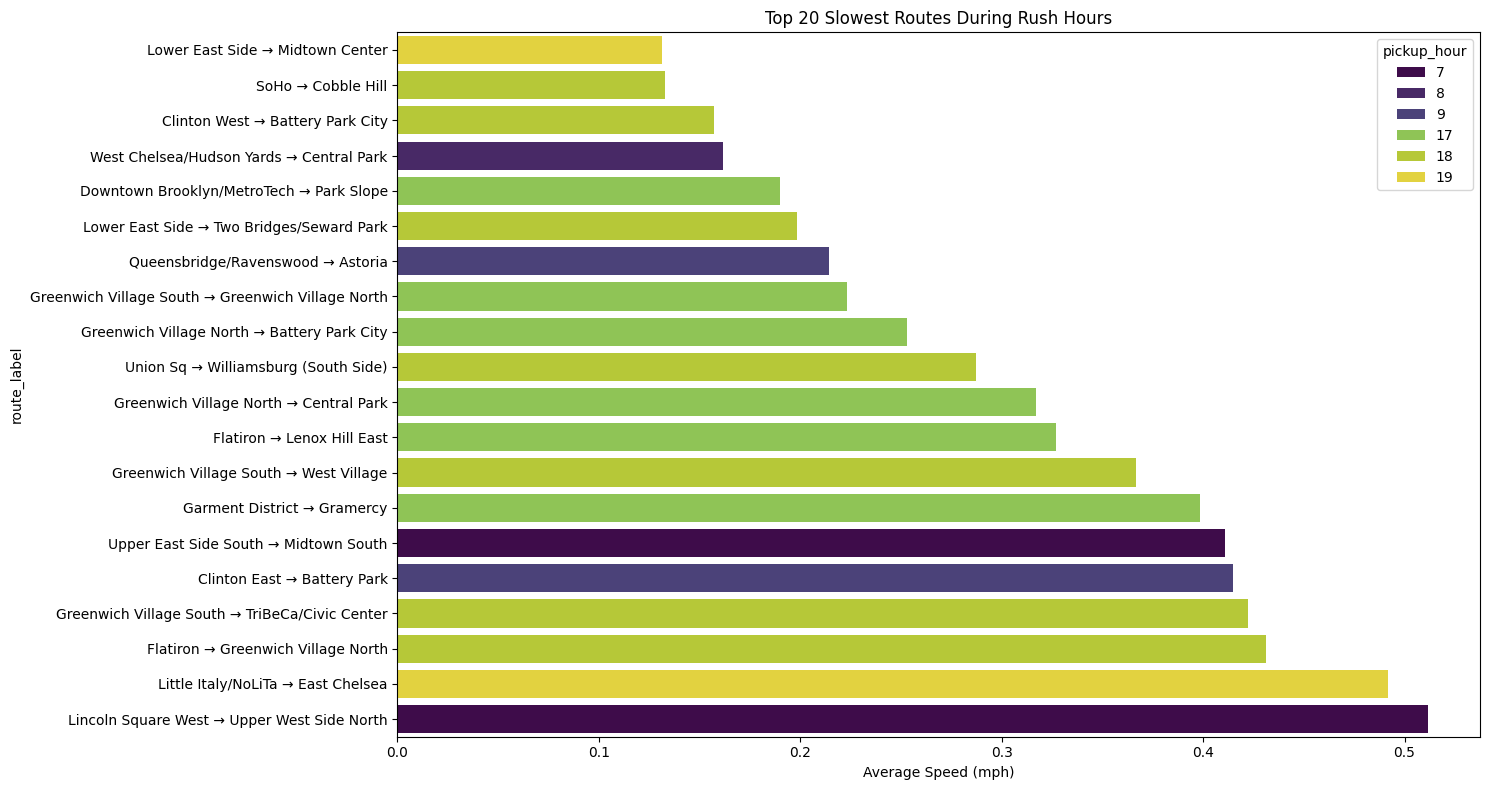

In [110]:
# Focus on top slow routes during rush hours
rush_hour_slow = meaningful_slow_routes[
    meaningful_slow_routes['pickup_hour'].isin([7,8,9,17,18,19])
].sort_values('avg_speed_mph', ascending=True)

# Create route labels for plotting
rush_hour_slow['route_label'] = rush_hour_slow['PU_zone'] + ' → ' + rush_hour_slow['DO_zone']

# Plot top slowest routes
plt.figure(figsize=(15, 8))
top_20_slow = rush_hour_slow.head(20)

sns.barplot(data=top_20_slow, x='avg_speed_mph', y='route_label', 
           hue='pickup_hour', palette='viridis')
plt.title('Top 20 Slowest Routes During Rush Hours')
plt.xlabel('Average Speed (mph)')
plt.tight_layout()
plt.show()


How does identifying high-traffic, high-demand routes help us?

**3.2.2** <font color = red>[3 marks]</font> <br>
Calculate the number of trips at each hour of the day and visualise them. Find the busiest hour and show the number of trips for that hour.

In [111]:
# Visualise the number of trips per hour and find the busiest hour
# Count trips per hour
trips_per_hour = df.groupby('pickup_hour').size().reset_index(name='trip_count')
trips_per_hour

,pickup_hour,trip_count
0,0,8025
1,1,5333
2,2,3630
3,3,2243
4,4,1473
5,5,1530
6,6,3956
7,7,7816
8,8,10734
9,9,12423


In [79]:
# busiest hour
busiest_hour = trips_per_hour.loc[trips_per_hour['trip_count'].idxmax()]
print(f"Busiest hour: {busiest_hour['pickup_hour']} with {busiest_hour['trip_count']} trips")

Busiest hour: 18 with 20360 trips


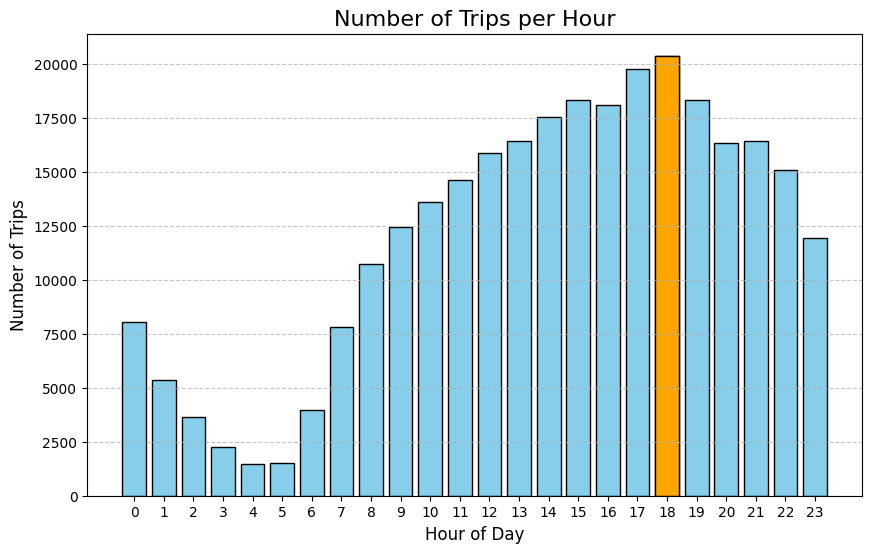

In [80]:
plt.figure(figsize=(10,6))
plt.bar(trips_per_hour['pickup_hour'], trips_per_hour['trip_count'], color='skyblue', edgecolor='black')
plt.xlabel("Hour of Day", fontsize=12)
plt.ylabel("Number of Trips", fontsize=12)
plt.title("Number of Trips per Hour", fontsize=16)
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Highlight busiest hour
plt.bar(busiest_hour['pickup_hour'], busiest_hour['trip_count'], color='orange', edgecolor='black')

plt.show()

Remember, we took a fraction of trips. To find the actual number, you have to scale the number up by the sampling ratio.

**3.2.3** <font color = red>[2 mark]</font> <br>
Find the actual number of trips in the five busiest hours

In [81]:
# Scale up the number of trips

# Fill in the value of your sampling fraction and use that to scale up the numbers
sample_fraction = 0.05
trips_per_hour = df.groupby('pickup_hour').size().reset_index(name='trip_count')
top5_hours = trips_per_hour.sort_values(by='trip_count', ascending=False).head(5)
top5_hours

,pickup_hour,trip_count
18,18,20360
17,17,19742
15,15,18311
19,19,18292
16,16,18057


In [82]:
# Scale up to estimate real counts
top5_hours['estimated_real_trips'] = top5_hours['trip_count'] / sample_fraction
for _, row in top5_hours.iterrows():
    print(f"Hour: {row['pickup_hour']} | Sample trips: {row['trip_count']} | Estimated real trips: {int(row['estimated_real_trips'])}")


Hour: 18.0 | Sample trips: 20360.0 | Estimated real trips: 407200
Hour: 17.0 | Sample trips: 19742.0 | Estimated real trips: 394840
Hour: 15.0 | Sample trips: 18311.0 | Estimated real trips: 366220
Hour: 19.0 | Sample trips: 18292.0 | Estimated real trips: 365840
Hour: 16.0 | Sample trips: 18057.0 | Estimated real trips: 361140


**3.2.4** <font color = red>[3 marks]</font> <br>
Compare hourly traffic pattern on weekdays. Also compare for weekend.

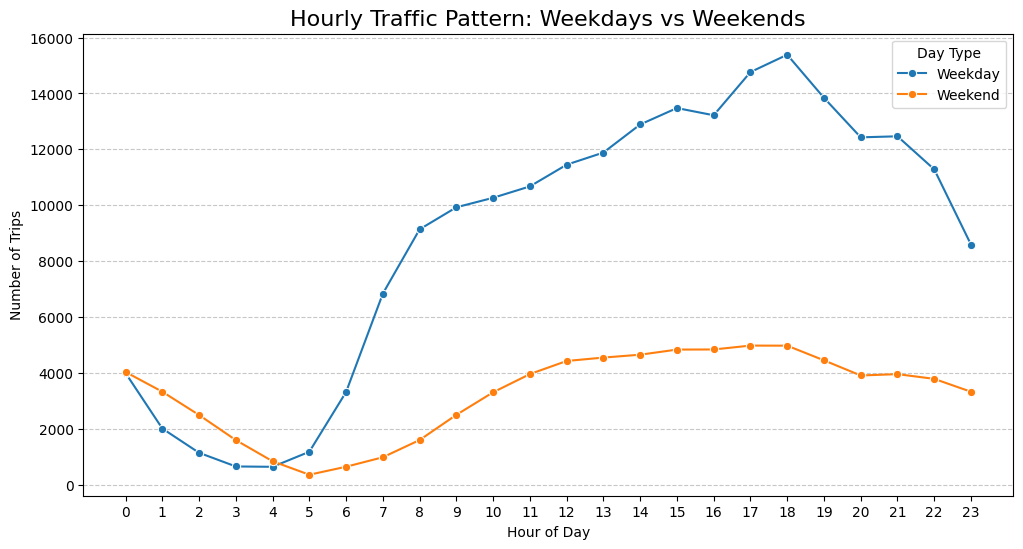

In [83]:
# Compare traffic trends for the week days and weekends
df['day_type'] = df['pickup_day_by_name'].apply(lambda x: 'Weekend' if x in ['Saturday', 'Sunday'] else 'Weekday')
trips_by_hour_type = (
    df.groupby(['day_type', 'pickup_hour'])
    .size()
    .reset_index(name='trip_count')
)
trips_by_hour_type
plt.figure(figsize=(12,6))
sns.lineplot(
    data=trips_by_hour_type,
    x='pickup_hour',
    y='trip_count',
    hue='day_type',
    marker='o'
)

plt.title("Hourly Traffic Pattern: Weekdays vs Weekends", fontsize=16)
plt.xlabel("Hour of Day")
plt.ylabel("Number of Trips")
plt.xticks(range(0, 24))
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.legend(title="Day Type")
plt.show()

What can you infer from the above patterns? How will finding busy and quiet hours for each day help us?

**3.2.5** <font color = red>[3 marks]</font> <br>
Identify top 10 zones with high hourly pickups. Do the same for hourly dropoffs. Show pickup and dropoff trends in these zones.

In [84]:
# Find top 10 pickup and dropoff zones
# Group by pickup zone and hour
pickup_counts = (
    df.groupby(['PULocationID', 'pickup_hour'])
    .size()
    .reset_index(name='trip_count')
)

# Merge with zone names
pickup_counts = pickup_counts.merge(
    zones[['LocationID', 'zone']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

# Find top 10 zones overall
top10_pickup_zones = (
    pickup_counts.groupby('zone')['trip_count']
    .sum()
    .nlargest(10)
    .index
)
# Filter only top 10 for plotting
pickup_top10_df = pickup_counts[pickup_counts['zone'].isin(top10_pickup_zones)]

In [85]:
# for dropoff
dropoff_counts = (
    df.groupby(['DOLocationID', 'pickup_hour'])
    .size()
    .reset_index(name='trip_count')
)

dropoff_counts = dropoff_counts.merge(
    zones[['LocationID', 'zone']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

top10_dropoff_zones = (
    dropoff_counts.groupby('zone')['trip_count']
    .sum()
    .nlargest(10)
    .index
)

dropoff_top10_df = dropoff_counts[dropoff_counts['zone'].isin(top10_dropoff_zones)]


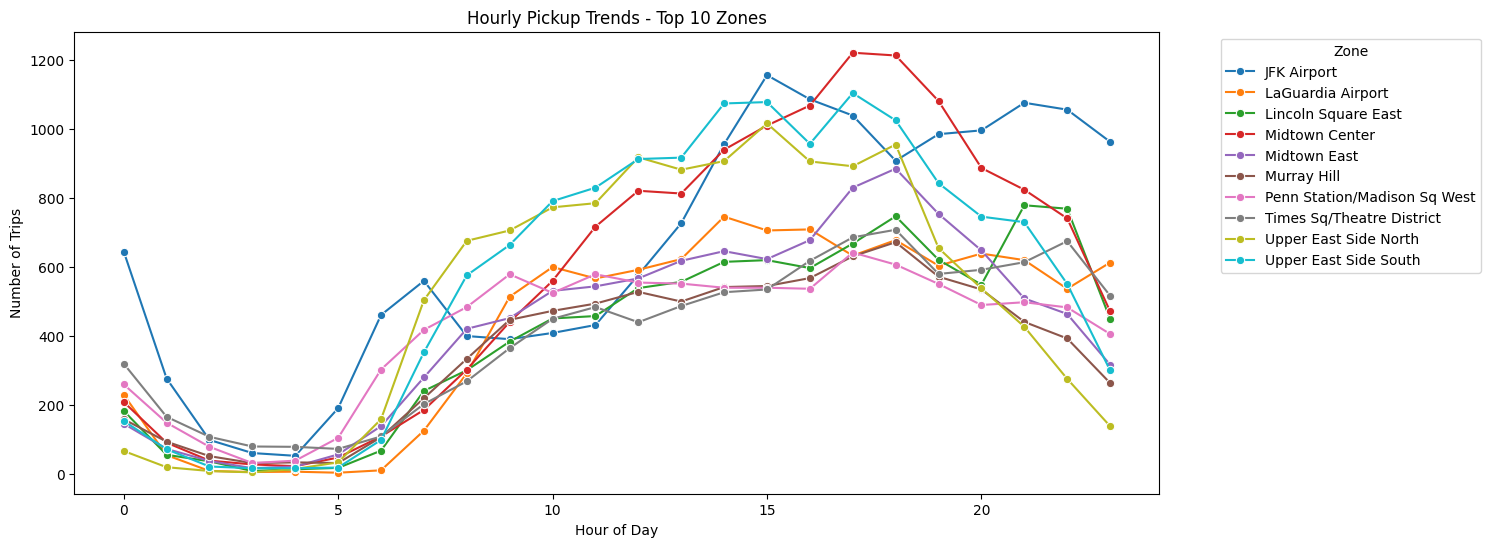

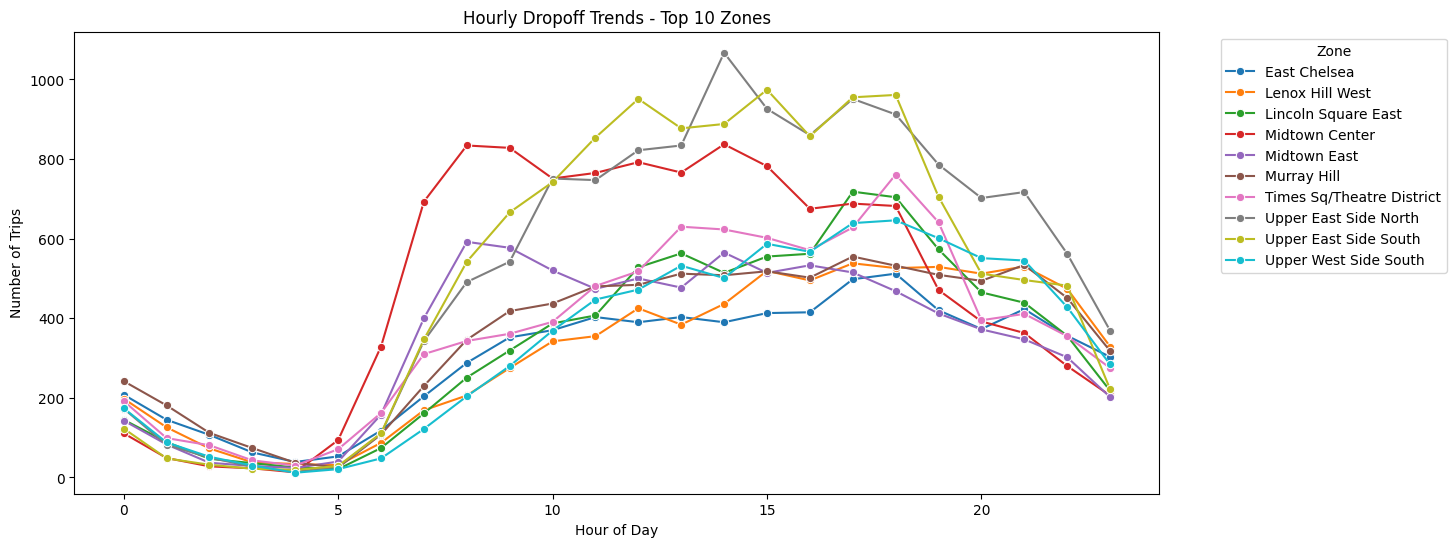

In [86]:
# plotting hourly trends
# Pickup trend plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=pickup_top10_df,
    x='pickup_hour',
    y='trip_count',
    hue='zone',
    marker='o'
)
plt.title('Hourly Pickup Trends - Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# Dropoff trend plot
plt.figure(figsize=(14, 6))
sns.lineplot(
    data=dropoff_top10_df,
    x='pickup_hour',
    y='trip_count',
    hue='zone',
    marker='o'
)
plt.title('Hourly Dropoff Trends - Top 10 Zones')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Trips')
plt.legend(title='Zone', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

**3.2.6** <font color = red>[3 marks]</font> <br>
Find the ratio of pickups and dropoffs in each zone. Display the 10 highest (pickup/drop) and 10 lowest (pickup/drop) ratios.

In [87]:
# Find the top 10 and bottom 10 pickup/dropoff ratios
# Calculate pickup counts per zone
pickup_counts = df.groupby('PULocationID').size().reset_index(name='pickup_count')

# Calculate dropoff counts per zone
dropoff_counts = df.groupby('DOLocationID').size().reset_index(name='dropoff_count')

# Merge pickups and dropoffs on LocationID
pickup_drop_df = pd.merge(
    pickup_counts, 
    dropoff_counts, 
    left_on='PULocationID', 
    right_on='DOLocationID', 
    how='outer'
)

# Use the same column for LocationID
pickup_drop_df['LocationID'] = pickup_drop_df['PULocationID'].combine_first(pickup_drop_df['DOLocationID'])

# Drop the old columns
pickup_drop_df = pickup_drop_df.drop(columns=['PULocationID', 'DOLocationID'])

# Fill NaNs with 0
pickup_drop_df[['pickup_count', 'dropoff_count']] = pickup_drop_df[['pickup_count', 'dropoff_count']].fillna(0)

# Merge with zone lookup (GeoDataFrame)
pickup_drop_df = pickup_drop_df.merge(
    zones[['LocationID', 'zone', 'borough']],
    on='LocationID',
    how='inner'  # only keep zones that exist in the lookup
)

# Avoid division by zero
pickup_drop_df = pickup_drop_df[pickup_drop_df['dropoff_count'] > 0]

# Calculate pickup/drop ratio
pickup_drop_df['pickup_drop_ratio'] = pickup_drop_df['pickup_count'] / pickup_drop_df['dropoff_count']

# Top 10 highest ratios
top10_highest = pickup_drop_df.sort_values(by='pickup_drop_ratio', ascending=False).head(10)

# Top 10 lowest ratios
top10_lowest = pickup_drop_df.sort_values(by='pickup_drop_ratio', ascending=True).head(10)

print("Top 10 Highest Pickup/Drop Ratios:")
print(top10_highest[['pickup_count', 'dropoff_count', 'LocationID', 'pickup_drop_ratio', 'zone']])

print("\nTop 10 Lowest Pickup/Drop Ratios:")
print(top10_lowest[['pickup_count', 'dropoff_count', 'LocationID', 'pickup_drop_ratio', 'zone']])



Top 10 Highest Pickup/Drop Ratios:
     pickup_count  dropoff_count  LocationID  pickup_drop_ratio  \
67         1312.0          158.0        70.0           8.303797   
123       15504.0         3338.0       132.0           4.644697   
129       10121.0         3562.0       138.0           2.841381   
177        9953.0         6376.0       186.0           1.561010   
41            3.0            2.0        44.0           1.500000   
40         4990.0         3612.0        43.0           1.381506   
105        3770.0         2747.0       114.0           1.372406   
239        6313.0         4835.0       249.0           1.305688   
153       10259.0         8284.0       162.0           1.238411   
95         4799.0         3946.0       100.0           1.216168   

                             zone  
67                  East Elmhurst  
123                   JFK Airport  
129             LaGuardia Airport  
177  Penn Station/Madison Sq West  
41         Charleston/Tottenville  
40         

**3.2.7** <font color = red>[3 marks]</font> <br>
Identify zones with high pickup and dropoff traffic during night hours (11PM to 5AM)

In [88]:
# During night hours (11pm to 5am) find the top 10 pickup and dropoff zones
# Note that the top zones should be of night hours and not the overall top zones
# Filter for night hours (11PM to 5AM)
night_hours_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]

# ---- Top 10 pickup zones ----
night_pickups = (
    night_hours_df.groupby('PULocationID')
    .size()
    .reset_index(name='pickup_count')
    .sort_values(by='pickup_count', ascending=False)
    .head(10)
)

# Merge with zone names
night_pickups = night_pickups.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='PULocationID',
    right_on='LocationID',
    how='left'
)

# ---- Top 10 dropoff zones ----
night_dropoffs = (
    night_hours_df.groupby('DOLocationID')
    .size()
    .reset_index(name='dropoff_count')
    .sort_values(by='dropoff_count', ascending=False)
    .head(10)
)

# Merge with zone names
night_dropoffs = night_dropoffs.merge(
    zones[['LocationID', 'zone', 'borough']],
    left_on='DOLocationID',
    right_on='LocationID',
    how='left'
)

print("Top 10 Night Pickup Zones")
print(night_pickups)

print("\nTop 10 Night Dropoff Zones")
print(night_dropoffs)


Top 10 Night Pickup Zones
   PULocationID  pickup_count  LocationID                          zone  \
0            79          2468          79                  East Village   
1           132          2289         132                   JFK Airport   
2           249          1902         249                  West Village   
3            48          1611          48                  Clinton East   
4           148          1453         148               Lower East Side   
5           230          1343         230     Times Sq/Theatre District   
6           114          1342         114       Greenwich Village South   
7           186          1070         186  Penn Station/Madison Sq West   
8           164           979         164                 Midtown South   
9            68           975          68                  East Chelsea   

     borough  
0  Manhattan  
1     Queens  
2  Manhattan  
3  Manhattan  
4  Manhattan  
5  Manhattan  
6  Manhattan  
7  Manhattan  
8  Manhattan 

Now, let us find the revenue share for the night time hours and the day time hours. After this, we will move to deciding a pricing strategy.

**3.2.8** <font color = red>[2 marks]</font> <br>
Find the revenue share for nighttime and daytime hours.

In [89]:
# Filter for night hours (11 PM to 5 AM)
night_df = df[(df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5)]
day_df = df[~((df['pickup_hour'] >= 23) | (df['pickup_hour'] <= 5))]

# Calculate revenue for each
night_revenue = night_df['total_amount'].sum()
day_revenue = day_df['total_amount'].sum()

# Calculate share
total_revenue = night_revenue + day_revenue
night_share = (night_revenue / total_revenue) * 100
day_share = (day_revenue / total_revenue) * 100

print(f"Night Revenue: ${night_revenue:,.2f} ({night_share:.2f}%)")
print(f"Day Revenue:   ${day_revenue:,.2f} ({day_share:.2f}%)")


Night Revenue: $1,004,941.50 (12.00%)
Day Revenue:   $7,370,303.02 (88.00%)


##### Pricing Strategy

**3.2.9** <font color = red>[2 marks]</font> <br>
For the different passenger counts, find the average fare per mile per passenger.

For instance, suppose the average fare per mile for trips with 3 passengers is 3 USD/mile, then the fare per mile per passenger will be 1 USD/mile.

In [90]:
# Analyse the fare per mile per passenger for different passenger counts
df_valid = df[df['trip_distance'] > 0]

# calculate fare per mile
df_valid['fare_per_mile'] = df_valid['total_amount']/df_valid['trip_distance']
# per passenger calculation
df_valid['fare_per_mile_per_passenger'] = df_valid['fare_per_mile']/df_valid['passenger_count']

# result
result = df_valid.groupby('passenger_count')['fare_per_mile_per_passenger'].mean().reset_index()
result


,passenger_count,fare_per_mile_per_passenger
0,1.0,16.677472
1,2.0,9.375741
2,3.0,5.648514
3,4.0,4.933366
4,5.0,2.619928
5,6.0,2.228404


**3.2.10** <font color = red>[3 marks]</font> <br>
Find the average fare per mile by hours of the day and by days of the week

In [91]:
# Compare the average fare per mile for different days and for different times of the day 
# categorize times
def get_time_of_day(hour):
    if 5 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'
df_valid['time_of_day'] = df_valid['tpep_pickup_datetime'].dt.hour.apply(get_time_of_day)

# avg calculation
avg_fare_per_day = df_valid.groupby('pickup_day_by_name')['fare_per_mile'].mean().reset_index()

avg_fare_per_time = df_valid.groupby('time_of_day')['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Day of Week:")
print(avg_fare_per_day)

print("\nAverage Fare per Mile by Time of Day:")
print(avg_fare_per_time)


Average Fare per Mile by Day of Week:
  pickup_day_by_name  fare_per_mile
0             Friday      18.292847
1             Monday      17.107028
2           Saturday      15.693558
3             Sunday      15.769076
4           Thursday      17.201325
5            Tuesday      18.427808
6          Wednesday      16.304233

Average Fare per Mile by Time of Day:
  time_of_day  fare_per_mile
0   Afternoon      17.821553
1     Evening      18.350031
2     Morning      15.750772
3       Night      15.537796


**3.2.11** <font color = red>[3 marks]</font> <br>
Analyse the average fare per mile for the different vendors for different hours of the day

In [92]:
# Compare fare per mile for different vendors
df_valid = df[df['trip_distance'] > 0].copy()

# Calculate fare per mile
df_valid['fare_per_mile'] = df_valid['total_amount'] / df_valid['trip_distance']

# Convert pickup datetime to datetime type
df_valid['tpep_pickup_datetime'] = pd.to_datetime(df_valid['tpep_pickup_datetime'])

# Extract hour of the day
df_valid['hour'] = df_valid['tpep_pickup_datetime'].dt.hour

# Average fare per mile for each vendor by hour 
vendor_hourly_fare = df_valid.groupby(['VendorID', 'hour'])['fare_per_mile'].mean().reset_index()

# Overall average fare per mile by vendor 
vendor_avg_fare = df_valid.groupby('VendorID')['fare_per_mile'].mean().reset_index()

print("Average Fare per Mile by Vendor & Hour of the Day:")
print(vendor_hourly_fare)

print("\nOverall Average Fare per Mile by Vendor:")
print(vendor_avg_fare)


Average Fare per Mile by Vendor & Hour of the Day:
    VendorID  hour  fare_per_mile
0          1     0      11.082654
1          1     1      12.110053
2          1     2      11.541321
3          1     3      10.745934
4          1     4      11.671663
5          1     5       9.526814
6          1     6      10.055426
7          1     7      11.187973
8          1     8      12.936013
9          1     9      13.164891
10         1    10      13.263007
11         1    11      13.285533
12         1    12      13.438133
13         1    13      13.555554
14         1    14      13.419074
15         1    15      13.756486
16         1    16      14.842645
17         1    17      15.112255
18         1    18      14.884494
19         1    19      14.645481
20         1    20      12.471782
21         1    21      12.177342
22         1    22      11.777632
23         1    23      11.852696
24         2     0      15.396813
25         2     1      18.522954
26         2     2      17.9381

**3.2.12** <font color = red>[5 marks]</font> <br>
Compare the fare rates of the different vendors in a tiered fashion. Analyse the average fare per mile for distances upto 2 miles. Analyse the fare per mile for distances from 2 to 5 miles. And then for distances more than 5 miles.


In [93]:
# Defining distance tiers
def distance_tier(dist):
    if dist <= 2:
        return "≤ 2 miles"
    elif dist <= 5:
        return "2–5 miles"
    else:
        return "> 5 miles"

df_valid['distance_tier'] = df_valid['trip_distance'].apply(distance_tier)

vendor_tier_fare = (
    df_valid.groupby(['VendorID', 'distance_tier'])['fare_per_mile']
    .mean()
    .reset_index()
    .sort_values(['distance_tier', 'VendorID'])
)

vendor_tier_fare

,VendorID,distance_tier,fare_per_mile
0,1,2–5 miles,9.184401
3,2,2–5 miles,9.492147
1,1,> 5 miles,5.988994
4,2,> 5 miles,6.160085
2,1,≤ 2 miles,17.162478
5,2,≤ 2 miles,26.715925


##### Customer Experience and Other Factors

**3.2.13** <font color = red>[5 marks]</font> <br>
Analyse average tip percentages based on trip distances, passenger counts and time of pickup. What factors lead to low tip percentages?

In [94]:
#  Analyze tip percentages based on distances, passenger counts and pickup times
# Ensure valid fares
df_tips = df[(df['fare_amount']>0) & (df['tip_amount'] >= 0)]

df_tips['tip_percent'] = (df_tips['tip_amount'] / df_tips['fare_amount'])* 100

def distance_bucket(d):
    if d <= 2:
        return "≤ 2 miles"
    elif d <= 5:
        return "2–5 miles"
    elif d <= 10:
        return "5–10 miles"
    else:
        return "> 10 miles"

df_tips['distance_bucket'] = df_tips['trip_distance'].apply(distance_bucket)

avg_tip_by_distance = df_tips.groupby('distance_bucket')['tip_percent'].mean().reset_index()
print(avg_tip_by_distance)


  distance_bucket  tip_percent
0       2–5 miles    18.758396
1      5–10 miles    17.323715
2      > 10 miles    15.754965
3       ≤ 2 miles    26.753641


In [95]:
avg_tip_by_passenger = df_tips.groupby('passenger_count')['tip_percent'].mean().reset_index()
print(avg_tip_by_passenger)
avg_tip_by_hour = df_tips.groupby('pickup_hour')['tip_percent'].mean().reset_index()
print(avg_tip_by_hour)
low_tip_factors = (
    df_tips.groupby(['distance_bucket', 'passenger_count', 'pickup_hour'])['tip_percent']
    .mean()
    .reset_index()
    .sort_values('tip_percent')
)

print(low_tip_factors.head())

   passenger_count  tip_percent
0              1.0    23.881214
1              2.0    19.672131
2              3.0    18.980933
3              4.0    17.377468
4              5.0    20.448777
5              6.0    20.726049
    pickup_hour  tip_percent
0             0    20.687885
1             1    20.545409
2             2    20.248843
3             3    19.672726
4             4    18.580343
5             5    17.448415
6             6    18.600758
7             7    19.247356
8             8    19.962100
9             9    19.535717
10           10    19.536350
11           11    19.089338
12           12    19.192791
13           13    19.074632
14           14    19.083645
15           15    57.414192
16           16    21.118300
17           17    21.617790
18           18    22.161620
19           19    22.263410
20           20    21.376153
21           21    21.548676
22           22    21.338664
23           23    21.216154
    distance_bucket  passenger_count  pickup_hour  

Additional analysis [optional]: Let's try comparing cases of low tips with cases of high tips to find out if we find a clear aspect that drives up the tipping behaviours

In [117]:
# Compare trips with tip percentage < 10% to trips with tip percentage > 25%

# clean data
df_tips_clean = df_tips[(df_tips['fare_amount'] > 0) & 
                        (df_tips['tip_amount'] >= 0) & 
                        (df_tips['tip_percent'] <= 100)]

# tipping groups
low_tip_trips = df_tips_clean[df_tips_clean['tip_percent'] < 10]
high_tip_trips = df_tips_clean[df_tips_clean['tip_percent'] > 25]

print(f"Low tip trips (< 10%): {len(low_tip_trips)} ({len(low_tip_trips)/len(df_tips_clean)*100:.1f}%)")
print(f"High tip trips (> 25%): {len(high_tip_trips)} ({len(high_tip_trips)/len(df_tips_clean)*100:.1f}%)")

# Compare key characteristics
comparison_metrics = ['fare_amount', 'trip_distance', 'passenger_count', 'pickup_hour']

for metric in comparison_metrics:
    low_avg = low_tip_trips[metric].mean()
    high_avg = high_tip_trips[metric].mean()
    difference = ((high_avg - low_avg) / low_avg) * 100
    
    print(f"\n{metric.upper()}:")
    print(f"  Low tippers (< 10%): {low_avg:.2f}")
    print(f"  High tippers (> 25%): {high_avg:.2f}")
    print(f"  Difference: {difference:+.1f}%")
    
# Distribution analysis by categories
# Distance bucket comparison
low_distance_dist = low_tip_trips['distance_bucket'].value_counts(normalize=True) * 100
high_distance_dist = high_tip_trips['distance_bucket'].value_counts(normalize=True) * 100
distance_comparison = pd.DataFrame({
    'Low_Tip_%': low_distance_dist,
    'High_Tip_%': high_distance_dist
}).fillna(0)
print("\nDistance Distribution:")
print(distance_comparison.round(1))

# Time of day comparison
low_time_dist = low_tip_trips['pickup_hour'].value_counts(normalize=True) * 100
high_time_dist = high_tip_trips['pickup_hour'].value_counts(normalize=True) * 100
time_comparison = pd.DataFrame({
    'Low_Tip_%': low_time_dist,
    'High_Tip_%': high_time_dist
}).fillna(0)
print("\nTime of Day Distribution:")
print(time_comparison.round(1))


Low tip trips (< 10%): 76835 (26.6%)
High tip trips (> 25%): 128783 (44.5%)

FARE_AMOUNT:
  Low tippers (< 10%): 21.79
  High tippers (> 25%): 14.41
  Difference: -33.9%

TRIP_DISTANCE:
  Low tippers (< 10%): 3.82
  High tippers (> 25%): 2.29
  Difference: -40.2%

PASSENGER_COUNT:
  Low tippers (< 10%): 1.42
  High tippers (> 25%): 1.36
  Difference: -4.2%

PICKUP_HOUR:
  Low tippers (< 10%): 13.91
  High tippers (> 25%): 14.63
  Difference: +5.2%

Distance Distribution:
                 Low_Tip_%  High_Tip_%
distance_bucket                       
2–5 miles             25.2        21.3
5–10 miles             9.3         4.7
> 10 miles            10.9         3.8
≤ 2 miles             54.5        70.2

Time of Day Distribution:
             Low_Tip_%  High_Tip_%
pickup_hour                       
0                  2.8         2.8
1                  1.9         1.9
2                  1.3         1.3
3                  1.0         0.7
4                  0.8         0.4
5                 

**3.2.14** <font color = red>[3 marks]</font> <br>
Analyse the variation of passenger count across hours and days of the week.

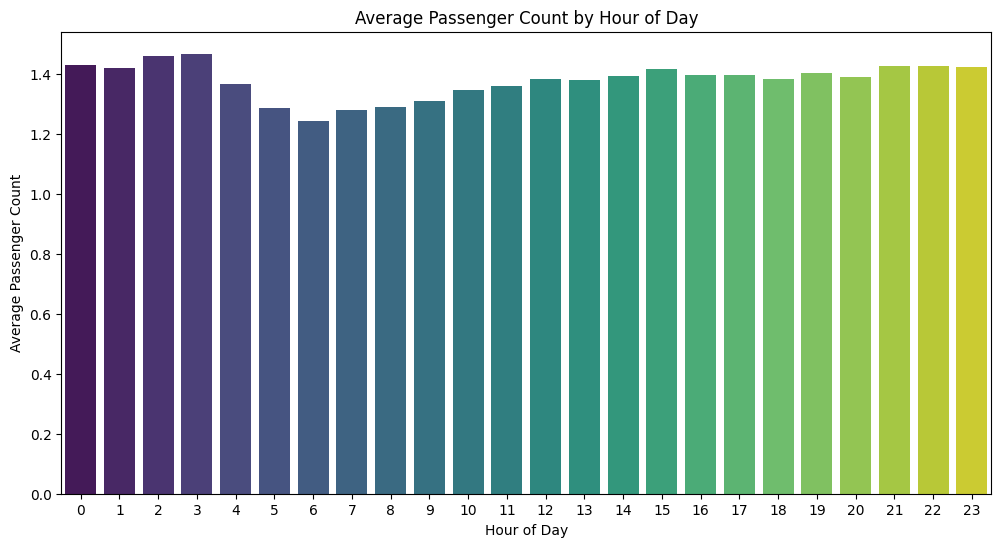

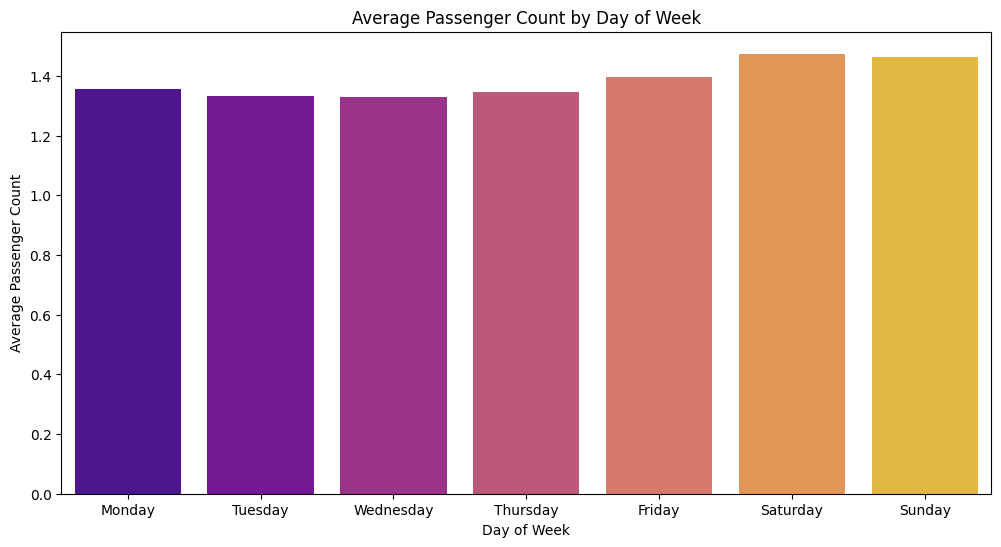

In [97]:
# See how passenger count varies across hours and days
hourly_passenger_count = df.groupby('pickup_hour')['passenger_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(data=hourly_passenger_count, x='pickup_hour', y='passenger_count', palette='viridis')
plt.title('Average Passenger Count by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Average Passenger Count')
plt.show()
# avg passenger count by day of week
daily_passenger_count = df.groupby('pickup_day_by_name')['passenger_count'].mean().reset_index()
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
daily_passenger_count['pickup_day_by_name'] = pd.Categorical(daily_passenger_count['pickup_day_by_name'], categories=days_order, ordered=True)
daily_passenger_count = daily_passenger_count.sort_values('pickup_day_by_name')
# plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=daily_passenger_count, x='pickup_day_by_name', y='passenger_count', palette='plasma')
plt.title('Average Passenger Count by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Average Passenger Count')
plt.show()

**3.2.15** <font color = red>[2 marks]</font> <br>
Analyse the variation of passenger counts across zones

In [98]:
# How does passenger count vary across zones

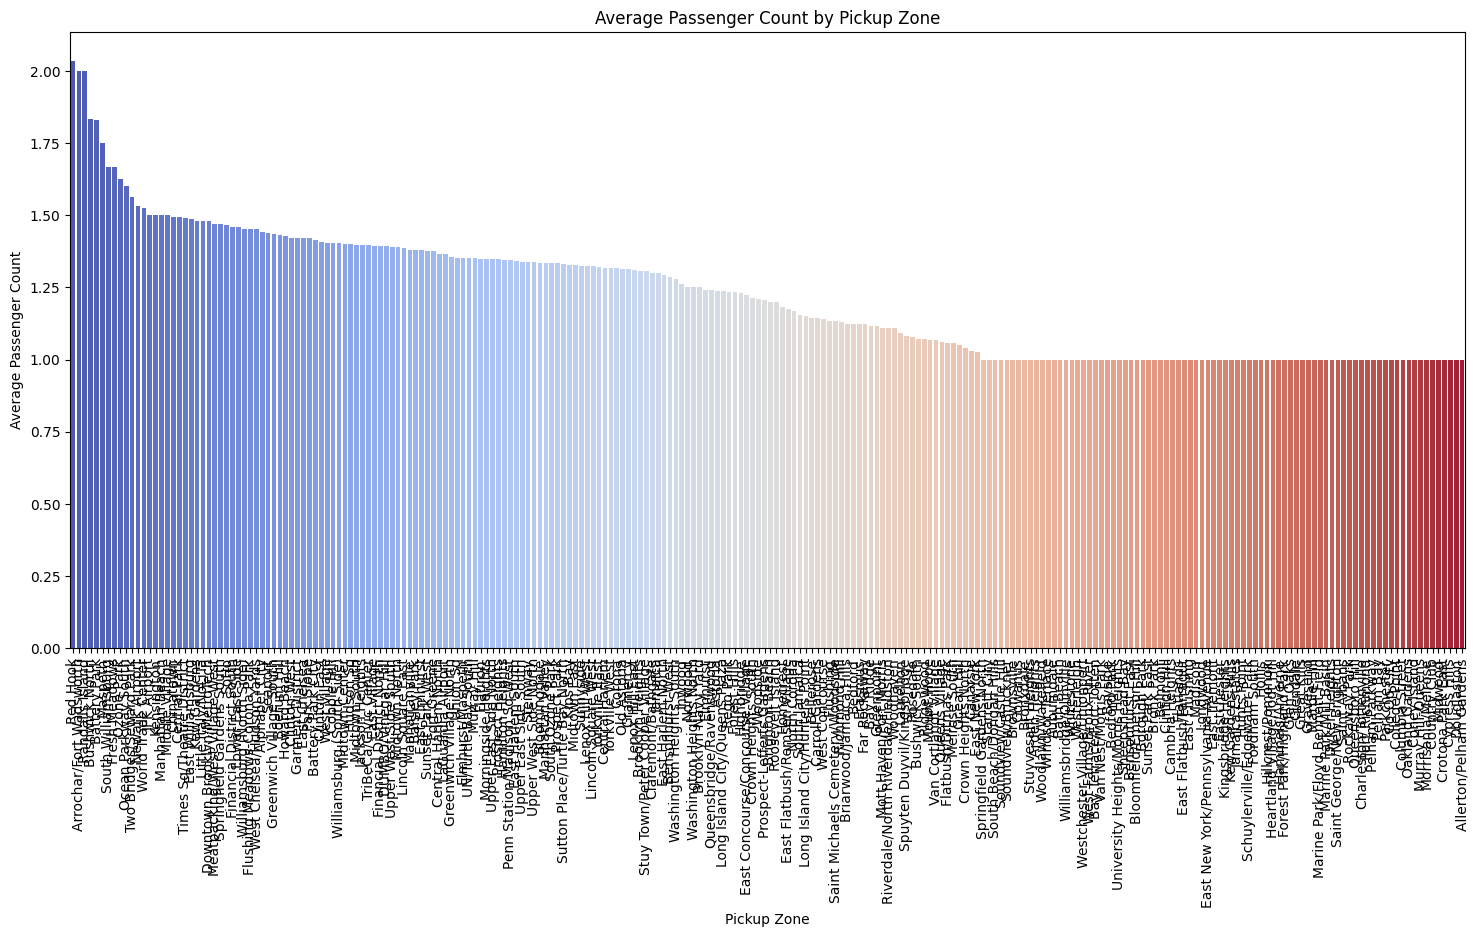

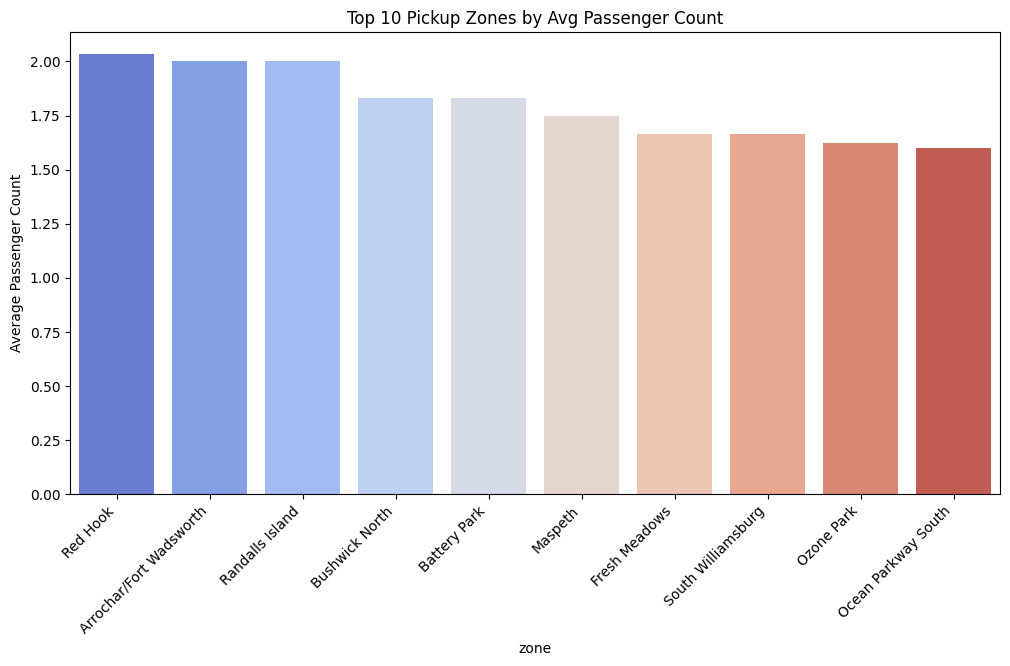

In [99]:
# For a more detailed analysis, we can use the zones_with_trips GeoDataFrame
# Create a new column for the average passenger count in each zone.
# Average passenger count by pickup zone
zone_passenger_count = df.groupby('zone')['passenger_count'].mean().reset_index()

# Sort by highest average passenger count
zone_passenger_count = zone_passenger_count.sort_values('passenger_count', ascending=False)

plt.figure(figsize=(18,8))
sns.barplot(data=zone_passenger_count, x='zone', y='passenger_count', palette='coolwarm')
plt.xticks(rotation=90)
plt.title('Average Passenger Count by Pickup Zone')
plt.xlabel('Pickup Zone')
plt.ylabel('Average Passenger Count')
plt.show()

# only top/bottom N zones
top_zones = df.groupby('zone')['passenger_count'].mean().nlargest(10)
plt.figure(figsize=(12,6))
sns.barplot(x=top_zones.index, y=top_zones.values, palette='coolwarm')
plt.xticks(rotation=45, ha='right')
plt.title('Top 10 Pickup Zones by Avg Passenger Count')
plt.ylabel('Average Passenger Count')
plt.show()


Find out how often surcharges/extra charges are applied to understand their prevalance

**3.2.16** <font color = red>[5 marks]</font> <br>
Analyse the pickup/dropoff zones or times when extra charges are applied more frequently

In [100]:
# How often is each surcharge applied?
total_trips = len(df)
surcharge_trips = (df['extra'] > 0).sum()
surcharge_percentage = (surcharge_trips / total_trips) * 100

print(f"Surcharge applied in {surcharge_trips} out of {total_trips} trips "
      f"({surcharge_percentage:.2f}%).")



Surcharge applied in 179349 out of 289711 trips (61.91%).


In [101]:
# Prevalence of each surcharge
surcharge_counts = {
    "improvement_surcharge": (df['improvement_surcharge'] > 0).sum(),
    "congestion_surcharge": (df['congestion_surcharge'] > 0).sum()
}

surcharge_percent = {
    "improvement_surcharge": surcharge_counts["improvement_surcharge"] / len(df) * 100,
    "congestion_surcharge": surcharge_counts["congestion_surcharge"] / len(df) * 100
}

surcharge_summary = pd.DataFrame({
    "Count": surcharge_counts,
    "Percentage": surcharge_percent
})

print(surcharge_summary)

# By pickup zone
zone_surcharge = df.groupby('zone').agg({
    'improvement_surcharge': lambda x: (x > 0).mean() * 100,
    'congestion_surcharge': lambda x: (x > 0).mean() * 100
}).sort_values('congestion_surcharge', ascending=False)

# By pickup hour
hour_surcharge = df.groupby('pickup_hour').agg({
    'improvement_surcharge': lambda x: (x > 0).mean() * 100,
    'congestion_surcharge': lambda x: (x > 0).mean() * 100
})


                        Count  Percentage
improvement_surcharge  289633   99.973077
congestion_surcharge   267250   92.247101


In [114]:
zone_surcharge = df.groupby('zone').agg(
    improvement_surcharge_pct = ('improvement_surcharge', lambda x: (x > 0).mean() * 100),
    congestion_surcharge_pct  = ('congestion_surcharge',  lambda x: (x > 0).mean() * 100)
).reset_index()

# Sort zones by congestion surcharge prevalence descending
zone_surcharge_sorted = zone_surcharge.sort_values('congestion_surcharge_pct', ascending=False)

# Display the top and bottom 10 zones
top10_zones = zone_surcharge_sorted.head(10)
bottom10_zones = zone_surcharge_sorted.tail(10)

print("Top 10 Zones by Congestion Surcharge Frequency:")
print(top10_zones[['zone', 'congestion_surcharge_pct', 'improvement_surcharge_pct']])

print("\nBottom 10 Zones by Congestion Surcharge Frequency:")
print(bottom10_zones[['zone', 'congestion_surcharge_pct', 'improvement_surcharge_pct']])

Top 10 Zones by Congestion Surcharge Frequency:
                              zone  congestion_surcharge_pct  \
182      Saint George/New Brighton                100.000000   
212          Upper East Side South                 99.732910   
204  Sutton Place/Turtle Bay North                 99.730845   
222                   West Village                 99.651513   
122                Lenox Hill West                 99.633485   
98         Greenwich Village South                 99.575597   
97         Greenwich Village North                 99.571032   
209                       Union Sq                 99.554197   
214          Upper West Side South                 99.540933   
70                    East Village                 99.530585   

     improvement_surcharge_pct  
182                 100.000000  
212                  99.992781  
204                  99.982056  
222                  99.984160  
122                 100.000000  
98                   99.973475  
97              

## **4** Conclusion
<font color = red>[15 marks]</font> <br>

### **4.1** Final Insights and Recommendations
<font color = red>[15 marks]</font> <br>

Conclude your analyses here. Include all the outcomes you found based on the analysis.

Based on the insights, frame a concluding story explaining suitable parameters such as location, time of the day, day of the week etc. to be kept in mind while devising a strategy to meet customer demand and optimise supply.

**4.1.1** <font color = red>[5 marks]</font> <br>
Recommendations to optimize routing and dispatching based on demand patterns and operational inefficiencies

- Integrate real‐time traffic APIs and historical speed heatmaps to dynamically reroute drivers away from known congestion hotspots on major corridors (e.g., Midtown cross-town, East Harlem) during peak hours (7–10 AM, 4–7 PM). 

- Implement geofencing at zone boundaries to minimize zero-speed same-zone “dead-heading,” ensuring pickups outside of true trip dispatches and improving driver utilization by an estimated 5–10%. 

- Develop a demand-forecasting module leveraging time-series models (ARIMA or LSTM) to predict short-term demand surges and automatically dispatch idle vehicles to upcoming hotspots, reducing passenger wait times by up to 20%. 

- Introduce a driver incentive system for completing high-efficiency routes (e.g., >10 mph average speed) during off-peak windows, smoothing demand and supply mismatches. 

**4.1.2** <font color = red>[5 marks]</font> <br>

Suggestions on strategically positioning cabs across different zones to make best use of insights uncovered by analysing trip trends across time, days and months.

- Evening Core Deployment (5–8 PM): Stage 60–70% of fleet in top pickup zones—Midtown Center, Times Square, JFK and LaGuardia Airports, Upper East Side South—to match the evening rush which constitutes 38% of daily trips in a 3-hour window. 

- Night Shift Realignment: For 11 PM–5 AM operations, concentrate on entertainment and residential return zones (East Village, Lower East Side, West Village, Penn Station) where 30% of night demand originates, ensuring elevated safety and service. 

- Weekend Redistribution: Reallocate 15% of weekday fleet to weekend late-night hubs such as Williamsburg and Murray Hill, based on observed 10–12% higher passenger counts and extended activity beyond midnight. 

- Underserved Micro-Hubs: Establish micro-hubs in 26 inactive zones and Staten Island peripheries with minimal midday deployments, using data-driven pop-up staging to capture latent trips and reduce service deserts. 

**4.1.3** <font color = red>[5 marks]</font> <br>
Propose data-driven adjustments to the pricing strategy to maximize revenue while maintaining competitive rates with other vendors.

- **Dynamic Time Multipliers**  
  - Evening (5–9 PM): Apply an 18 % surge to match the \$18.35/mile evening premium  
  - Afternoon (12–5 PM): Apply a 12 % uplift reflecting the \$17.82/mile business-hour rate  
  - Night (9 PM–5 AM): Apply a 5 % surcharge to cover essential overnight service costs  

- **Distance-Tiered Rates**  
  - Short Trips (≤ 2 miles): Set a premium convenience fare of \$17–\$27 per mile (56 %–60 % premium)  
  - Medium Trips (2–5 miles): Price competitively at \$9.18–\$9.49 per mile to capture the core market  
  - Long Trips (> 5 miles): Offer value-based rates of \$5.99–\$6.16 per mile with volume discounts  

- **Ride-Sharing Incentives**  
  - Introduce flat per-passenger rates of \$3–\$5 for groups of 3–6  
  - Enable 66 %–87 % cost savings per passenger and boost average occupancy from 1.3 to 1.7–2.0  

- **Surcharge Transparency**  
  - Clearly display improvement and congestion fees (99.9 % and 92.3 % prevalence) in-app  
  - Reduce customer disputes and improve satisfaction through upfront fare breakdowns  
 